# A Predictive Analysis of What Makes a Book a Reader's Favorite

                                                                                         Submitted by:
                                                                                         Akarsha Hegde
                                                                                         Rujhan Maniktalia
                                                                                         Yudhishna Kuppala

# Step 1:- Abstract

**This analysis focused on four key questions related to a book dataset. It aimed to determine the most popular genre, predict the likelihood of a book receiving an award, calculate the average selling price of a book by its author, and identify the genre favored by a large audience. To answer these questions, various machine learning models were developed and evaluated, leveraging techniques like feature engineering, data preprocessing, and model evaluation.**

**To predict genre, different models, including Logistic Regression, Random Forest, Neural Network, and Stacking Ensemble, were tested to determine the best performing approach. For predicting the likelihood of a book receiving an award, various classifiers were evaluated, including Logistic Regression and XGBoost. The analysis for the average selling price used both linear regression and ensemble models. In exploring genre preference, the distribution and popularity of genres were assessed to identify the most favored by audiences. The results provided insights into the effectiveness of different models and approaches in answering these questions.**

# Research Questions

**We are focussing on below 4 questions as a part of our project**

- Finding out Genre through NLP and Machine Learning Models.

- Can we predict the likelihood of a book receiving an award based on its initial reader engagement and critical reception?

- What is the typical selling price of a book by the author?

- Which genre is favored by a larger audience?


# Step 2:- Introduction

**With the evergrowing ways to gaining knowledge or being entertained, books have been a constant. There are so many books to choose from that finding the right one can feel overwhelming. Our project wants to make this easier by figuring out what makes some books really grab people's attention. We're going to look into things like what kind of story it is, who wrote it, and what other readers think about it.**

**We're going to take a close look at different parts of a book, such as its genre, the fame of the author, and the ratings and comments it gets from readers. It's like putting together a puzzle to see why some books are loved by so many people. Our goal is to find out what the most popular books have in common and why certain books become favorites.**

**We have a lot of data to work with, including book ratings, types of stories, and how much people are talking about them. By looking at all this information, we want to figure out what makes a book successful. Maybe it's how readers connect with the characters, the topics the book covers, or how well it's advertised. Our research will try to find out what really makes a book stand out. We hope to give useful tips to readers, writers, and book publishers on what makes a book really special and worth reading.**

# Data Dictionary

- bookId: A unique identifier for the book on goodreads.com. (Completeness: 100%)
- title: The title of the book. (Completeness: 100%)
- series: The name of the series the book belongs to, if applicable. (Completeness: 45%)
- author: The author of the book. (Completeness: 100%)
- rating: The average global rating on GoodReads, usually on a scale from 0 to 5. (Completeness: 100%)
- description: A brief description or summary of the book's content. (Completeness: 97%)
- language: The language in which the book is written. (Completeness: 93%)
- isbn: The International Standard Book Number, a unique identifier for books. (Completeness: 92%)
- genres: Categories or genres that the book falls into, such as Fiction, Mystery, etc. (Completeness: 91%)
- characters: The main characters in the book, if specified. (Completeness: 26%)
- bookFormat: The type of binding or format, like Hardcover or Paperback. (Completeness: 97%)
- edition: Specific edition type, such as "Anniversary Edition." (Completeness: 9%)
- pages: The total number of pages in the book. (Completeness: 96%)
- publisher: The publishing company or editorial. (Completeness: 93%)
- publishDate: The publication date of the book. Note that there is an inconsistency in format (first 30,000 records are in mm/dd/yyyy, remaining are in "Month Day Year"). (Completeness: 98%)
- firstPublishDate: The publication date of the book's first edition. (Completeness: 59%)
- awards: A list of awards the book has received, if any. (Completeness: 20%)
- numRatings: The total number of ratings the book has received on GoodReads. (Completeness: 100%)
- ratingsByStars: The distribution of ratings by star level (e.g., number of 5-star, 4-star ratings, etc.). (Completeness: 97%)
- likedPercent: The percentage of ratings that are above 2 stars (a derived field). (Completeness: 99%)
- setting: The geographical or temporal setting where the story takes place. (Completeness: 22%)
- coverImg: A URL linking to an image of the book's cover. (Completeness: 99%)
- bbeScore: The score for the book in the GoodReads Best Books Ever list. (Completeness: 100%)
- bbeVotes: The number of votes the book has in the GoodReads Best Books Ever list. (Completeness: 100%)
- price: The book's price, derived from Iberlibro. (Completeness: 73%)

**Importing Required Libraries**

In [2]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
#Importing Libreries
import numpy as np
import pandas as pd
#Importing to Visualize the data
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import r2_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import PowerTransformer, MinMaxScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

# Reading the Data Set

In [3]:
#Reading data from the GitHub Repository
books_data = pd.read_csv("https://raw.githubusercontent.com/rujhanmaniktalia/DataScience/main/BestBooks.csv")

books_data.head(10)

,bookId,title,series,author,rating,description,language,isbn,genres,characters,...,4 Star Rating,3 Star Rating,2 Star Rating,1 Star Rating,likedPercent,setting,coverImg,bbeScore,bbeVotes,price
0,2767052-the-hunger-games,The Hunger Games,The Hunger Games #1,Suzanne Collins,4.33,WINNING MEANS FAME AND FORTUNE.LOSING MEANS CE...,English,9.78E+12,Fiction,"['Katniss Everdeen', 'Peeta Mellark', 'Cato (H...",...,1921313.0,745221.0,171994.0,93557.0,96.0,"['District 12, Panem', 'Capitol, Panem', 'Pane...",https://i.gr-assets.com/images/S/compressed.ph...,2993816,30516,5.09
1,2.Harry_Potter_and_the_Order_of_the_Phoenix,Harry Potter and the Order of the Phoenix,Harry Potter #5,J.K. Rowling,4.50,There is a door at the end of a silent corrido...,English,9.78E+12,Young Adult,"['Sirius Black', 'Draco Malfoy', 'Ron Weasley'...",...,637516.0,222366.0,39573.0,14526.0,98.0,['Hogwarts School of Witchcraft and Wizardry (...,https://i.gr-assets.com/images/S/compressed.ph...,2632233,26923,7.38
2,2657.To_Kill_a_Mockingbird,To Kill a Mockingbird,To Kill a Mockingbird,Harper Lee,4.28,The unforgettable novel of a childhood in a sl...,English,1.00E+13,Fiction,"['Scout Finch', 'Atticus Finch', 'Jem Finch', ...",...,1333153.0,573280.0,149952.0,80794.0,95.0,"['Maycomb, Alabama (United States)']",https://i.gr-assets.com/images/S/compressed.ph...,2269402,23328,NaN
3,1885.Pride_and_Prejudice,Pride and Prejudice,NaN,Jane Austen,4.26,Alternate cover edition of ISBN 9780679783268S...,English,1.00E+13,Fiction,"['Mr. Bennet', 'Mrs. Bennet', 'Jane Bennet', '...",...,816659.0,373311.0,113934.0,76770.0,94.0,"['United Kingdom', 'Derbyshire, England (Unite...",https://i.gr-assets.com/images/S/compressed.ph...,1983116,20452,NaN
4,41865.Twilight,Twilight,The Twilight Saga #1,Stephenie Meyer,3.60,About three things I was absolutely positive.\...,English,9.78E+12,Fantasy,"['Edward Cullen', 'Jacob Black', 'Laurent', 'R...",...,1113682.0,1008686.0,542017.0,548674.0,78.0,"['Forks, Washington (United States)', 'Phoenix...",https://i.gr-assets.com/images/S/compressed.ph...,1459448,14874,2.1
5,19063.The_Book_Thief,The Book Thief,NaN,Markus Zusak (Goodreads Author),4.37,Librarian's note: An alternate cover edition c...,English,9.78E+12,Fiction,"['Liesel Meminger', 'Hans Hubermann', 'Rudy St...",...,524674.0,186297.0,48864.0,26211.0,96.0,"['Molching (Germany)', 'Germany']",https://i.gr-assets.com/images/S/compressed.ph...,1372809,14168,3.8
6,170448.Animal_Farm,Animal Farm,NaN,George Orwell,3.95,Librarian's note: There is an Alternate Cover ...,English,9.78E+12,Fiction,"['Snowball', 'Napoleon', 'Clover', 'Boxer', 'O...",...,958699.0,545475.0,165093.0,84682.0,91.0,"['England', 'United Kingdom']",https://i.gr-assets.com/images/S/compressed.ph...,1276599,13264,4.42
7,11127.The_Chronicles_of_Narnia,The Chronicles of Narnia,The Chronicles of Narnia (Publication Order) #1–7,C.S. Lewis,4.26,"Journeys to the end of the world, fantastic cr...",English,1.00E+13,Classics,"['Polly', 'Aslan', 'Lucy Pevensie', 'Edmund Pe...",...,167572.0,74362.0,15423.0,5419.0,96.0,"['London, England']",https://i.gr-assets.com/images/S/compressed.ph...,1238556,12949,NaN
8,30.J_R_R_Tolkien_4_Book_Boxed_Set,J.R.R. Tolkien 4-Book Boxed Set: The Hobbit an...,The Lord of the Rings #0-3,J.R.R. Tolkien,4.60,"This four-volume, boxed set contains J.R.R. To...",English,9.78E+12,Fiction,"['Frodo Baggins', 'Gandalf', 'Bilbo Baggins', ...",...,22857.0,6628.0,1477.0,967.0,98.0,['Middle-earth'],https://i.gr-assets.com/images/S/compressed.ph...,1159802,12111,21.15
9,18405.Gone_with_the_Wind,Gone with the Wind,NaN,Margaret Mitchell,4.30,"Scarlett O'Hara, the beautiful, spoiled daught...",English,9.78E+12,Historical Fiction,"[""Scarlett O'Hara"", 'Rhett Butler', 'Ashley Wi...",...,275517.0,133535.0,39008.0,24422.0,94.0,"['Atlanta, Georgia (United States)']",https://i.gr-assets.com/images/S/compressed.ph...,1087732,11211,5.58


In [4]:
# Use regex to extract the number of awards
books_data['number_of_awards'] = books_data['awards'].str.count(r'[^,]+,')

# Display the DataFrame
books_data['number_of_awards']

0        40
1         8
2         3
3         0
4        24
         ..
52473     0
52474     0
52475     0
52476     0
52477     0
Name: number_of_awards, Length: 52478, dtype: int64

In [5]:
#crosschecking the data
books_data

,bookId,title,series,author,rating,description,language,isbn,genres,characters,...,3 Star Rating,2 Star Rating,1 Star Rating,likedPercent,setting,coverImg,bbeScore,bbeVotes,price,number_of_awards
0,2767052-the-hunger-games,The Hunger Games,The Hunger Games #1,Suzanne Collins,4.33,WINNING MEANS FAME AND FORTUNE.LOSING MEANS CE...,English,9.78E+12,Fiction,"['Katniss Everdeen', 'Peeta Mellark', 'Cato (H...",...,745221.0,171994.0,93557.0,96.0,"['District 12, Panem', 'Capitol, Panem', 'Pane...",https://i.gr-assets.com/images/S/compressed.ph...,2993816,30516,5.09,40
1,2.Harry_Potter_and_the_Order_of_the_Phoenix,Harry Potter and the Order of the Phoenix,Harry Potter #5,J.K. Rowling,4.50,There is a door at the end of a silent corrido...,English,9.78E+12,Young Adult,"['Sirius Black', 'Draco Malfoy', 'Ron Weasley'...",...,222366.0,39573.0,14526.0,98.0,['Hogwarts School of Witchcraft and Wizardry (...,https://i.gr-assets.com/images/S/compressed.ph...,2632233,26923,7.38,8
2,2657.To_Kill_a_Mockingbird,To Kill a Mockingbird,To Kill a Mockingbird,Harper Lee,4.28,The unforgettable novel of a childhood in a sl...,English,1.00E+13,Fiction,"['Scout Finch', 'Atticus Finch', 'Jem Finch', ...",...,573280.0,149952.0,80794.0,95.0,"['Maycomb, Alabama (United States)']",https://i.gr-assets.com/images/S/compressed.ph...,2269402,23328,NaN,3
3,1885.Pride_and_Prejudice,Pride and Prejudice,NaN,Jane Austen,4.26,Alternate cover edition of ISBN 9780679783268S...,English,1.00E+13,Fiction,"['Mr. Bennet', 'Mrs. Bennet', 'Jane Bennet', '...",...,373311.0,113934.0,76770.0,94.0,"['United Kingdom', 'Derbyshire, England (Unite...",https://i.gr-assets.com/images/S/compressed.ph...,1983116,20452,NaN,0
4,41865.Twilight,Twilight,The Twilight Saga #1,Stephenie Meyer,3.60,About three things I was absolutely positive.\...,English,9.78E+12,Fantasy,"['Edward Cullen', 'Jacob Black', 'Laurent', 'R...",...,1008686.0,542017.0,548674.0,78.0,"['Forks, Washington (United States)', 'Phoenix...",https://i.gr-assets.com/images/S/compressed.ph...,1459448,14874,2.1,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52473,11492014-fractured,Fractured,Fateful #2,Cheri Schmidt (Goodreads Author),4.00,The Fateful Trilogy continues with Fractured. ...,English,2.94E+12,Paranormal,[],...,197.0,42.0,11.0,94.0,[],https://i.gr-assets.com/images/S/compressed.ph...,0,1,NaN,0
52474,11836711-anasazi,Anasazi,Sense of Truth #2,Emma Michaels,4.19,"'Anasazi', sequel to 'The Thirteenth Chime' by...",English,1.00E+13,Young Adult],[],...,5.0,2.0,0.0,95.0,[],https://i.gr-assets.com/images/S/compressed.ph...,0,1,NaN,0
52475,10815662-marked,Marked,Soul Guardians #1,Kim Richardson (Goodreads Author),3.70,--READERS FAVORITE AWARDS WINNER 2011--Sixteen...,English,9.78E+12,Young Adult,[],...,1660.0,647.0,390.0,84.0,[],https://i.gr-assets.com/images/S/compressed.ph...,0,1,7.37,0
52476,11330278-wayward-son,Wayward Son,NaN,Tom Pollack (Goodreads Author),3.85,A POWERFUL TREMOR UNEARTHS AN ANCIENT SECRETBu...,English,9.78E+12,Mystery,[],...,59.0,19.0,5.0,90.0,[],https://i.gr-assets.com/images/S/compressed.ph...,0,1,2.86,0


In [6]:
#crosschecking columns
books_data.columns

Index(['bookId', 'title', 'series', 'author', 'rating', 'description',
       'language', 'isbn', 'genres', 'characters', 'bookFormat', 'edition',
       'pages', 'publisher', 'publishDate', 'firstPublishDate', 'awards',
       'numRatings', '5 Star Rating', '4 Star Rating', '3 Star Rating',
       '2 Star Rating', '1 Star Rating', 'likedPercent', 'setting', 'coverImg',
       'bbeScore', 'bbeVotes', 'price', 'number_of_awards'],
      dtype='object')

# Data Cleaning & Data preparation

In our data cleaning and preparation process, we detected and eliminated duplicate records to maintain data consistency. We also dealt with missing values by using suitable strategies to replace or remove them, ensuring the dataset was as complete and dependable as possible for analysis.

Furthermore, we removed any special characters as part of our data cleaning efforts.

In [8]:
#checking datatypes
books_data.dtypes

bookId               object
title                object
series               object
author               object
rating              float64
description          object
language             object
isbn                 object
genres               object
characters           object
bookFormat           object
edition              object
pages                object
publisher            object
publishDate          object
firstPublishDate     object
awards               object
numRatings            int64
5 Star Rating       float64
4 Star Rating       float64
3 Star Rating       float64
2 Star Rating       float64
1 Star Rating       float64
likedPercent        float64
setting              object
coverImg             object
bbeScore              int64
bbeVotes              int64
price                object
number_of_awards      int64
dtype: object

In [9]:
#Analysing rows and columns to find the number of rows and columns in a data set
books_data.shape

(52478, 30)

In [10]:
#lets check whether data is duplicated or not
books_data.duplicated().sum()

50

In [11]:
#Dropping duplicates
books_data.drop_duplicates()

,bookId,title,series,author,rating,description,language,isbn,genres,characters,...,3 Star Rating,2 Star Rating,1 Star Rating,likedPercent,setting,coverImg,bbeScore,bbeVotes,price,number_of_awards
0,2767052-the-hunger-games,The Hunger Games,The Hunger Games #1,Suzanne Collins,4.33,WINNING MEANS FAME AND FORTUNE.LOSING MEANS CE...,English,9.78E+12,Fiction,"['Katniss Everdeen', 'Peeta Mellark', 'Cato (H...",...,745221.0,171994.0,93557.0,96.0,"['District 12, Panem', 'Capitol, Panem', 'Pane...",https://i.gr-assets.com/images/S/compressed.ph...,2993816,30516,5.09,40
1,2.Harry_Potter_and_the_Order_of_the_Phoenix,Harry Potter and the Order of the Phoenix,Harry Potter #5,J.K. Rowling,4.50,There is a door at the end of a silent corrido...,English,9.78E+12,Young Adult,"['Sirius Black', 'Draco Malfoy', 'Ron Weasley'...",...,222366.0,39573.0,14526.0,98.0,['Hogwarts School of Witchcraft and Wizardry (...,https://i.gr-assets.com/images/S/compressed.ph...,2632233,26923,7.38,8
2,2657.To_Kill_a_Mockingbird,To Kill a Mockingbird,To Kill a Mockingbird,Harper Lee,4.28,The unforgettable novel of a childhood in a sl...,English,1.00E+13,Fiction,"['Scout Finch', 'Atticus Finch', 'Jem Finch', ...",...,573280.0,149952.0,80794.0,95.0,"['Maycomb, Alabama (United States)']",https://i.gr-assets.com/images/S/compressed.ph...,2269402,23328,NaN,3
3,1885.Pride_and_Prejudice,Pride and Prejudice,NaN,Jane Austen,4.26,Alternate cover edition of ISBN 9780679783268S...,English,1.00E+13,Fiction,"['Mr. Bennet', 'Mrs. Bennet', 'Jane Bennet', '...",...,373311.0,113934.0,76770.0,94.0,"['United Kingdom', 'Derbyshire, England (Unite...",https://i.gr-assets.com/images/S/compressed.ph...,1983116,20452,NaN,0
4,41865.Twilight,Twilight,The Twilight Saga #1,Stephenie Meyer,3.60,About three things I was absolutely positive.\...,English,9.78E+12,Fantasy,"['Edward Cullen', 'Jacob Black', 'Laurent', 'R...",...,1008686.0,542017.0,548674.0,78.0,"['Forks, Washington (United States)', 'Phoenix...",https://i.gr-assets.com/images/S/compressed.ph...,1459448,14874,2.1,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52473,11492014-fractured,Fractured,Fateful #2,Cheri Schmidt (Goodreads Author),4.00,The Fateful Trilogy continues with Fractured. ...,English,2.94E+12,Paranormal,[],...,197.0,42.0,11.0,94.0,[],https://i.gr-assets.com/images/S/compressed.ph...,0,1,NaN,0
52474,11836711-anasazi,Anasazi,Sense of Truth #2,Emma Michaels,4.19,"'Anasazi', sequel to 'The Thirteenth Chime' by...",English,1.00E+13,Young Adult],[],...,5.0,2.0,0.0,95.0,[],https://i.gr-assets.com/images/S/compressed.ph...,0,1,NaN,0
52475,10815662-marked,Marked,Soul Guardians #1,Kim Richardson (Goodreads Author),3.70,--READERS FAVORITE AWARDS WINNER 2011--Sixteen...,English,9.78E+12,Young Adult,[],...,1660.0,647.0,390.0,84.0,[],https://i.gr-assets.com/images/S/compressed.ph...,0,1,7.37,0
52476,11330278-wayward-son,Wayward Son,NaN,Tom Pollack (Goodreads Author),3.85,A POWERFUL TREMOR UNEARTHS AN ANCIENT SECRETBu...,English,9.78E+12,Mystery,[],...,59.0,19.0,5.0,90.0,[],https://i.gr-assets.com/images/S/compressed.ph...,0,1,2.86,0


In [7]:
#using data describe for nitial data exploration and understanding the dataset's basic properties before diving into more advanced analyses.
books_data.describe()

,rating,numRatings,5 Star Rating,4 Star Rating,3 Star Rating,2 Star Rating,1 Star Rating,likedPercent,bbeScore,bbeVotes,number_of_awards
count,52478.000000,5.247800e+04,5.105500e+04,5.105500e+04,5.105500e+04,51055.000000,51055.000000,51856.000000,5.247800e+04,52478.000000,52478.000000
mean,4.021878,1.787865e+04,7.484731e+03,6.142703e+03,3.409080e+03,927.724669,412.456899,92.231545,1.984023e+03,22.529003,0.232345
std,0.367146,1.039448e+05,5.141797e+04,3.205159e+04,1.719529e+04,5657.252469,3764.066064,5.990689,3.515314e+04,369.158541,1.059540
min,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,-4.000000,0.000000
25%,3.820000,3.410000e+02,1.460000e+02,1.340000e+02,7.800000e+01,19.000000,7.000000,90.000000,8.400000e+01,1.000000,0.000000
50%,4.030000,2.307000e+03,8.830000e+02,8.330000e+02,4.900000e+02,117.000000,39.000000,94.000000,9.700000e+01,1.000000,0.000000
75%,4.230000,9.380500e+03,3.565000e+03,3.371000e+03,1.956500e+03,475.000000,163.000000,96.000000,1.870000e+02,2.000000,0.000000
max,5.000000,7.048471e+06,4.578137e+06,1.921313e+06,1.008686e+06,542017.000000,548674.000000,100.000000,2.993816e+06,30516.000000,40.000000


In [12]:
#checking for missing values
books_data.isnull().sum().sort_values(ascending=False)

edition             47523
series              29008
firstPublishDate    21326
price               14365
genres               6693
language             3806
publisher            3696
pages                2347
bookFormat           1473
2 Star Rating        1423
1 Star Rating        1423
5 Star Rating        1423
4 Star Rating        1423
3 Star Rating        1423
description          1338
publishDate           880
likedPercent          622
coverImg              605
bbeScore                0
bbeVotes                0
setting                 0
bookId                  0
numRatings              0
awards                  0
title                   0
characters              0
isbn                    0
rating                  0
author                  0
number_of_awards        0
dtype: int64

In [14]:
import re  # Import the regular expressions library

# Apply a lambda function to the 'bookId' column
# This lambda function extracts the first sequence of digits from the bookId
# If no digits are found, it assigns 'None'
books_data['bookId'] = books_data['bookId'].apply(
    lambda x: re.findall(r'\d+', x)[0] if re.findall(r'\d+', x) else None
)

# Display the first 50 rows of the dataset to review the changes made to the 'bookId' column
books_data.head(50)


,bookId,title,series,author,rating,description,language,isbn,genres,characters,...,3 Star Rating,2 Star Rating,1 Star Rating,likedPercent,setting,coverImg,bbeScore,bbeVotes,price,number_of_awards
0,2767052,The Hunger Games,The Hunger Games #1,Suzanne Collins,4.33,WINNING MEANS FAME AND FORTUNE.LOSING MEANS CE...,English,9.78E+12,Fiction,"['Katniss Everdeen', 'Peeta Mellark', 'Cato (H...",...,745221.0,171994.0,93557.0,96.0,"['District 12, Panem', 'Capitol, Panem', 'Pane...",https://i.gr-assets.com/images/S/compressed.ph...,2993816,30516,5.09,40
1,2,Harry Potter and the Order of the Phoenix,Harry Potter #5,J.K. Rowling,4.50,There is a door at the end of a silent corrido...,English,9.78E+12,Young Adult,"['Sirius Black', 'Draco Malfoy', 'Ron Weasley'...",...,222366.0,39573.0,14526.0,98.0,['Hogwarts School of Witchcraft and Wizardry (...,https://i.gr-assets.com/images/S/compressed.ph...,2632233,26923,7.38,8
2,2657,To Kill a Mockingbird,To Kill a Mockingbird,Harper Lee,4.28,The unforgettable novel of a childhood in a sl...,English,1.00E+13,Fiction,"['Scout Finch', 'Atticus Finch', 'Jem Finch', ...",...,573280.0,149952.0,80794.0,95.0,"['Maycomb, Alabama (United States)']",https://i.gr-assets.com/images/S/compressed.ph...,2269402,23328,NaN,3
3,1885,Pride and Prejudice,NaN,Jane Austen,4.26,Alternate cover edition of ISBN 9780679783268S...,English,1.00E+13,Fiction,"['Mr. Bennet', 'Mrs. Bennet', 'Jane Bennet', '...",...,373311.0,113934.0,76770.0,94.0,"['United Kingdom', 'Derbyshire, England (Unite...",https://i.gr-assets.com/images/S/compressed.ph...,1983116,20452,NaN,0
4,41865,Twilight,The Twilight Saga #1,Stephenie Meyer,3.60,About three things I was absolutely positive.\...,English,9.78E+12,Fantasy,"['Edward Cullen', 'Jacob Black', 'Laurent', 'R...",...,1008686.0,542017.0,548674.0,78.0,"['Forks, Washington (United States)', 'Phoenix...",https://i.gr-assets.com/images/S/compressed.ph...,1459448,14874,2.1,24
5,19063,The Book Thief,NaN,Markus Zusak (Goodreads Author),4.37,Librarian's note: An alternate cover edition c...,English,9.78E+12,Fiction,"['Liesel Meminger', 'Hans Hubermann', 'Rudy St...",...,186297.0,48864.0,26211.0,96.0,"['Molching (Germany)', 'Germany']",https://i.gr-assets.com/images/S/compressed.ph...,1372809,14168,3.8,19
6,170448,Animal Farm,NaN,George Orwell,3.95,Librarian's note: There is an Alternate Cover ...,English,9.78E+12,Fiction,"['Snowball', 'Napoleon', 'Clover', 'Boxer', 'O...",...,545475.0,165093.0,84682.0,91.0,"['England', 'United Kingdom']",https://i.gr-assets.com/images/S/compressed.ph...,1276599,13264,4.42,1
7,11127,The Chronicles of Narnia,The Chronicles of Narnia (Publication Order) #1–7,C.S. Lewis,4.26,"Journeys to the end of the world, fantastic cr...",English,1.00E+13,Classics,"['Polly', 'Aslan', 'Lucy Pevensie', 'Edmund Pe...",...,74362.0,15423.0,5419.0,96.0,"['London, England']",https://i.gr-assets.com/images/S/compressed.ph...,1238556,12949,NaN,0
8,30,J.R.R. Tolkien 4-Book Boxed Set: The Hobbit an...,The Lord of the Rings #0-3,J.R.R. Tolkien,4.60,"This four-volume, boxed set contains J.R.R. To...",English,9.78E+12,Fiction,"['Frodo Baggins', 'Gandalf', 'Bilbo Baggins', ...",...,6628.0,1477.0,967.0,98.0,['Middle-earth'],https://i.gr-assets.com/images/S/compressed.ph...,1159802,12111,21.15,0
9,18405,Gone with the Wind,NaN,Margaret Mitchell,4.30,"Scarlett O'Hara, the beautiful, spoiled daught...",English,9.78E+12,Historical Fiction,"[""Scarlett O'Hara"", 'Rhett Butler', 'Ashley Wi...",...,133535.0,39008.0,24422.0,94.0,"['Atlanta, Georgia (United States)']",https://i.gr-assets.com/images/S/compressed.ph...,1087732,11211,5.58,1


In [20]:
#Analysed data and removed few columns which is not required for our analysis
books_data.drop(columns=['isbn','setting','coverImg'],inplace=True)

In [21]:
#crosschecking
books_data

,bookId,title,series,author,rating,description,language,genres,characters,bookFormat,...,5 Star Rating,4 Star Rating,3 Star Rating,2 Star Rating,1 Star Rating,likedPercent,bbeScore,bbeVotes,price,number_of_awards
0,2767052,The Hunger Games,The Hunger Games #1,Suzanne Collins,4.33,WINNING MEANS FAME AND FORTUNE.LOSING MEANS CE...,English,Fiction,"['Katniss Everdeen', 'Peeta Mellark', 'Cato (H...",Hardcover,...,3444695.0,1921313.0,745221.0,171994.0,93557.0,96.0,2993816,30516,5.09,40
1,2,Harry Potter and the Order of the Phoenix,Harry Potter #5,J.K. Rowling,4.50,There is a door at the end of a silent corrido...,English,Young Adult,"['Sirius Black', 'Draco Malfoy', 'Ron Weasley'...",Paperback,...,1593642.0,637516.0,222366.0,39573.0,14526.0,98.0,2632233,26923,7.38,8
2,2657,To Kill a Mockingbird,To Kill a Mockingbird,Harper Lee,4.28,The unforgettable novel of a childhood in a sl...,English,Fiction,"['Scout Finch', 'Atticus Finch', 'Jem Finch', ...",Paperback,...,2363896.0,1333153.0,573280.0,149952.0,80794.0,95.0,2269402,23328,NaN,3
3,1885,Pride and Prejudice,NaN,Jane Austen,4.26,Alternate cover edition of ISBN 9780679783268S...,English,Fiction,"['Mr. Bennet', 'Mrs. Bennet', 'Jane Bennet', '...",Paperback,...,1617567.0,816659.0,373311.0,113934.0,76770.0,94.0,1983116,20452,NaN,0
4,41865,Twilight,The Twilight Saga #1,Stephenie Meyer,3.60,About three things I was absolutely positive.\...,English,Fantasy,"['Edward Cullen', 'Jacob Black', 'Laurent', 'R...",Paperback,...,1751460.0,1113682.0,1008686.0,542017.0,548674.0,78.0,1459448,14874,2.1,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52473,11492014,Fractured,Fateful #2,Cheri Schmidt (Goodreads Author),4.00,The Fateful Trilogy continues with Fractured. ...,English,Paranormal,[],Nook,...,311.0,310.0,197.0,42.0,11.0,94.0,0,1,NaN,0
52474,11836711,Anasazi,Sense of Truth #2,Emma Michaels,4.19,"'Anasazi', sequel to 'The Thirteenth Chime' by...",English,Young Adult],[],Paperback,...,16.0,14.0,5.0,2.0,0.0,95.0,0,1,NaN,0
52475,10815662,Marked,Soul Guardians #1,Kim Richardson (Goodreads Author),3.70,--READERS FAVORITE AWARDS WINNER 2011--Sixteen...,English,Young Adult,[],Paperback,...,2109.0,1868.0,1660.0,647.0,390.0,84.0,0,1,7.37,0
52476,11330278,Wayward Son,NaN,Tom Pollack (Goodreads Author),3.85,A POWERFUL TREMOR UNEARTHS AN ANCIENT SECRETBu...,English,Mystery,[],Paperback,...,77.0,78.0,59.0,19.0,5.0,90.0,0,1,2.86,0


In [22]:
# Calculate the proportion of missing values for each column
missing_percentage = (books_data.isnull().sum() / len(books_data)) * 100

print("Percentage of missing values:")
print(missing_percentage)

Percentage of missing values:
bookId               0.000000
title                0.000000
series              55.276497
author               0.000000
rating               0.000000
description          2.549640
language             7.252563
genres              12.753916
characters           0.000000
bookFormat           2.806891
edition             90.557948
pages                4.472350
publisher            7.042951
publishDate          1.676893
firstPublishDate    40.637982
awards               0.000000
numRatings           0.000000
5 Star Rating        2.711612
4 Star Rating        2.711612
3 Star Rating        2.711612
2 Star Rating        2.711612
1 Star Rating        2.711612
likedPercent         1.185259
bbeScore             0.000000
bbeVotes             0.000000
price               27.373376
number_of_awards     0.000000
dtype: float64


In [23]:
# First, ensure the experimental feature is enabled
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import KNNImputer, IterativeImputer
import numpy as np
import pandas as pd

# Assuming 'selected_df' is your DataFrame with missing values and 'missing_percentage' is a dictionary with missing percentages
# Identify numeric and non-numeric columns
numeric_cols = books_data.select_dtypes(include=[np.number]).columns.tolist()
non_numeric_cols = books_data.select_dtypes(exclude=[np.number]).columns.tolist()

# Create a copy of the DataFrame to perform imputation
imputed_df = books_data.copy()

# Initialize Imputers
knn_imputer = KNNImputer(n_neighbors=5)  # Adjust as needed
iterative_imputer = IterativeImputer(max_iter=10, random_state=0)

# Impute numeric data based on the missing percentage
for column in numeric_cols:
    reshaped_data = imputed_df[[column]].values.reshape(-1, 1)

    if missing_percentage[column] <= 30:
        # Use KNN Imputer for up to 30% missing data
        imputed_df[column] = knn_imputer.fit_transform(reshaped_data).flatten()
    else:
        # Use Iterative Imputer for more than 30% missing data
        imputed_df[column] = iterative_imputer.fit_transform(reshaped_data).flatten()

# For non-numeric columns, impute with mode (most common value)
for column in non_numeric_cols:
    if missing_percentage[column] > 0:
        # Fill with the most common value
        imputed_df[column].fillna(imputed_df[column].mode()[0], inplace=True)

print("DataFrame after imputation:")
imputed_df.head()


DataFrame after imputation:


,bookId,title,series,author,rating,description,language,genres,characters,bookFormat,...,5 Star Rating,4 Star Rating,3 Star Rating,2 Star Rating,1 Star Rating,likedPercent,bbeScore,bbeVotes,price,number_of_awards
0,2767052,The Hunger Games,The Hunger Games #1,Suzanne Collins,4.33,WINNING MEANS FAME AND FORTUNE.LOSING MEANS CE...,English,Fiction,"['Katniss Everdeen', 'Peeta Mellark', 'Cato (H...",Hardcover,...,3444695.0,1921313.0,745221.0,171994.0,93557.0,96.0,2993816.0,30516.0,5.09,40.0
1,2,Harry Potter and the Order of the Phoenix,Harry Potter #5,J.K. Rowling,4.50,There is a door at the end of a silent corrido...,English,Young Adult,"['Sirius Black', 'Draco Malfoy', 'Ron Weasley'...",Paperback,...,1593642.0,637516.0,222366.0,39573.0,14526.0,98.0,2632233.0,26923.0,7.38,8.0
2,2657,To Kill a Mockingbird,To Kill a Mockingbird,Harper Lee,4.28,The unforgettable novel of a childhood in a sl...,English,Fiction,"['Scout Finch', 'Atticus Finch', 'Jem Finch', ...",Paperback,...,2363896.0,1333153.0,573280.0,149952.0,80794.0,95.0,2269402.0,23328.0,5.2,3.0
3,1885,Pride and Prejudice,Star Wars Legends,Jane Austen,4.26,Alternate cover edition of ISBN 9780679783268S...,English,Fiction,"['Mr. Bennet', 'Mrs. Bennet', 'Jane Bennet', '...",Paperback,...,1617567.0,816659.0,373311.0,113934.0,76770.0,94.0,1983116.0,20452.0,5.2,0.0
4,41865,Twilight,The Twilight Saga #1,Stephenie Meyer,3.60,About three things I was absolutely positive.\...,English,Fantasy,"['Edward Cullen', 'Jacob Black', 'Laurent', 'R...",Paperback,...,1751460.0,1113682.0,1008686.0,542017.0,548674.0,78.0,1459448.0,14874.0,2.1,24.0


In [24]:
#crosschecking
imputed_df

,bookId,title,series,author,rating,description,language,genres,characters,bookFormat,...,5 Star Rating,4 Star Rating,3 Star Rating,2 Star Rating,1 Star Rating,likedPercent,bbeScore,bbeVotes,price,number_of_awards
0,2767052,The Hunger Games,The Hunger Games #1,Suzanne Collins,4.33,WINNING MEANS FAME AND FORTUNE.LOSING MEANS CE...,English,Fiction,"['Katniss Everdeen', 'Peeta Mellark', 'Cato (H...",Hardcover,...,3444695.0,1921313.0,745221.0,171994.0,93557.0,96.0,2993816.0,30516.0,5.09,40.0
1,2,Harry Potter and the Order of the Phoenix,Harry Potter #5,J.K. Rowling,4.50,There is a door at the end of a silent corrido...,English,Young Adult,"['Sirius Black', 'Draco Malfoy', 'Ron Weasley'...",Paperback,...,1593642.0,637516.0,222366.0,39573.0,14526.0,98.0,2632233.0,26923.0,7.38,8.0
2,2657,To Kill a Mockingbird,To Kill a Mockingbird,Harper Lee,4.28,The unforgettable novel of a childhood in a sl...,English,Fiction,"['Scout Finch', 'Atticus Finch', 'Jem Finch', ...",Paperback,...,2363896.0,1333153.0,573280.0,149952.0,80794.0,95.0,2269402.0,23328.0,5.2,3.0
3,1885,Pride and Prejudice,Star Wars Legends,Jane Austen,4.26,Alternate cover edition of ISBN 9780679783268S...,English,Fiction,"['Mr. Bennet', 'Mrs. Bennet', 'Jane Bennet', '...",Paperback,...,1617567.0,816659.0,373311.0,113934.0,76770.0,94.0,1983116.0,20452.0,5.2,0.0
4,41865,Twilight,The Twilight Saga #1,Stephenie Meyer,3.60,About three things I was absolutely positive.\...,English,Fantasy,"['Edward Cullen', 'Jacob Black', 'Laurent', 'R...",Paperback,...,1751460.0,1113682.0,1008686.0,542017.0,548674.0,78.0,1459448.0,14874.0,2.1,24.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52473,11492014,Fractured,Fateful #2,Cheri Schmidt (Goodreads Author),4.00,The Fateful Trilogy continues with Fractured. ...,English,Paranormal,[],Nook,...,311.0,310.0,197.0,42.0,11.0,94.0,0.0,1.0,5.2,0.0
52474,11836711,Anasazi,Sense of Truth #2,Emma Michaels,4.19,"'Anasazi', sequel to 'The Thirteenth Chime' by...",English,Young Adult],[],Paperback,...,16.0,14.0,5.0,2.0,0.0,95.0,0.0,1.0,5.2,0.0
52475,10815662,Marked,Soul Guardians #1,Kim Richardson (Goodreads Author),3.70,--READERS FAVORITE AWARDS WINNER 2011--Sixteen...,English,Young Adult,[],Paperback,...,2109.0,1868.0,1660.0,647.0,390.0,84.0,0.0,1.0,7.37,0.0
52476,11330278,Wayward Son,Star Wars Legends,Tom Pollack (Goodreads Author),3.85,A POWERFUL TREMOR UNEARTHS AN ANCIENT SECRETBu...,English,Mystery,[],Paperback,...,77.0,78.0,59.0,19.0,5.0,90.0,0.0,1.0,2.86,0.0


In [25]:
#finding misssing percentage
missing_percentage = (imputed_df.isnull().sum() / len(imputed_df)) * 100

print("Percentage of missing values:")
print(missing_percentage)

Percentage of missing values:
bookId              0.0
title               0.0
series              0.0
author              0.0
rating              0.0
description         0.0
language            0.0
genres              0.0
characters          0.0
bookFormat          0.0
edition             0.0
pages               0.0
publisher           0.0
publishDate         0.0
firstPublishDate    0.0
awards              0.0
numRatings          0.0
5 Star Rating       0.0
4 Star Rating       0.0
3 Star Rating       0.0
2 Star Rating       0.0
1 Star Rating       0.0
likedPercent        0.0
bbeScore            0.0
bbeVotes            0.0
price               0.0
number_of_awards    0.0
dtype: float64


In [26]:
# Define a function to remove special characters using regular expressions
def remove_special_characters(text):
    import re
    # Define the pattern to remove any character that is not a letter, digit, or whitespace
    pattern = r'[^a-zA-Z0-9\s]'
    # Replace the special characters with an empty string
    return re.sub(pattern, '', text)

# Apply the function to the column you want to clean
imputed_df['genres'] = imputed_df['genres'].apply(remove_special_characters)

In [27]:
# Calculate the proportion of missing values for each column
missing_percentage_1 = (imputed_df.isnull().sum() / len(imputed_df)) * 100

print("Percentage of missing values:")
print(missing_percentage_1)

Percentage of missing values:
bookId              0.0
title               0.0
series              0.0
author              0.0
rating              0.0
description         0.0
language            0.0
genres              0.0
characters          0.0
bookFormat          0.0
edition             0.0
pages               0.0
publisher           0.0
publishDate         0.0
firstPublishDate    0.0
awards              0.0
numRatings          0.0
5 Star Rating       0.0
4 Star Rating       0.0
3 Star Rating       0.0
2 Star Rating       0.0
1 Star Rating       0.0
likedPercent        0.0
bbeScore            0.0
bbeVotes            0.0
price               0.0
number_of_awards    0.0
dtype: float64


# Exploratory Data Analysis

# Univariate Analysis

Univariate analysis refers to the examination and analysis of a single variable in a dataset. This type of analysis focuses solely on one variable at a time to understand its distribution, central tendency, dispersion, and other fundamental properties.

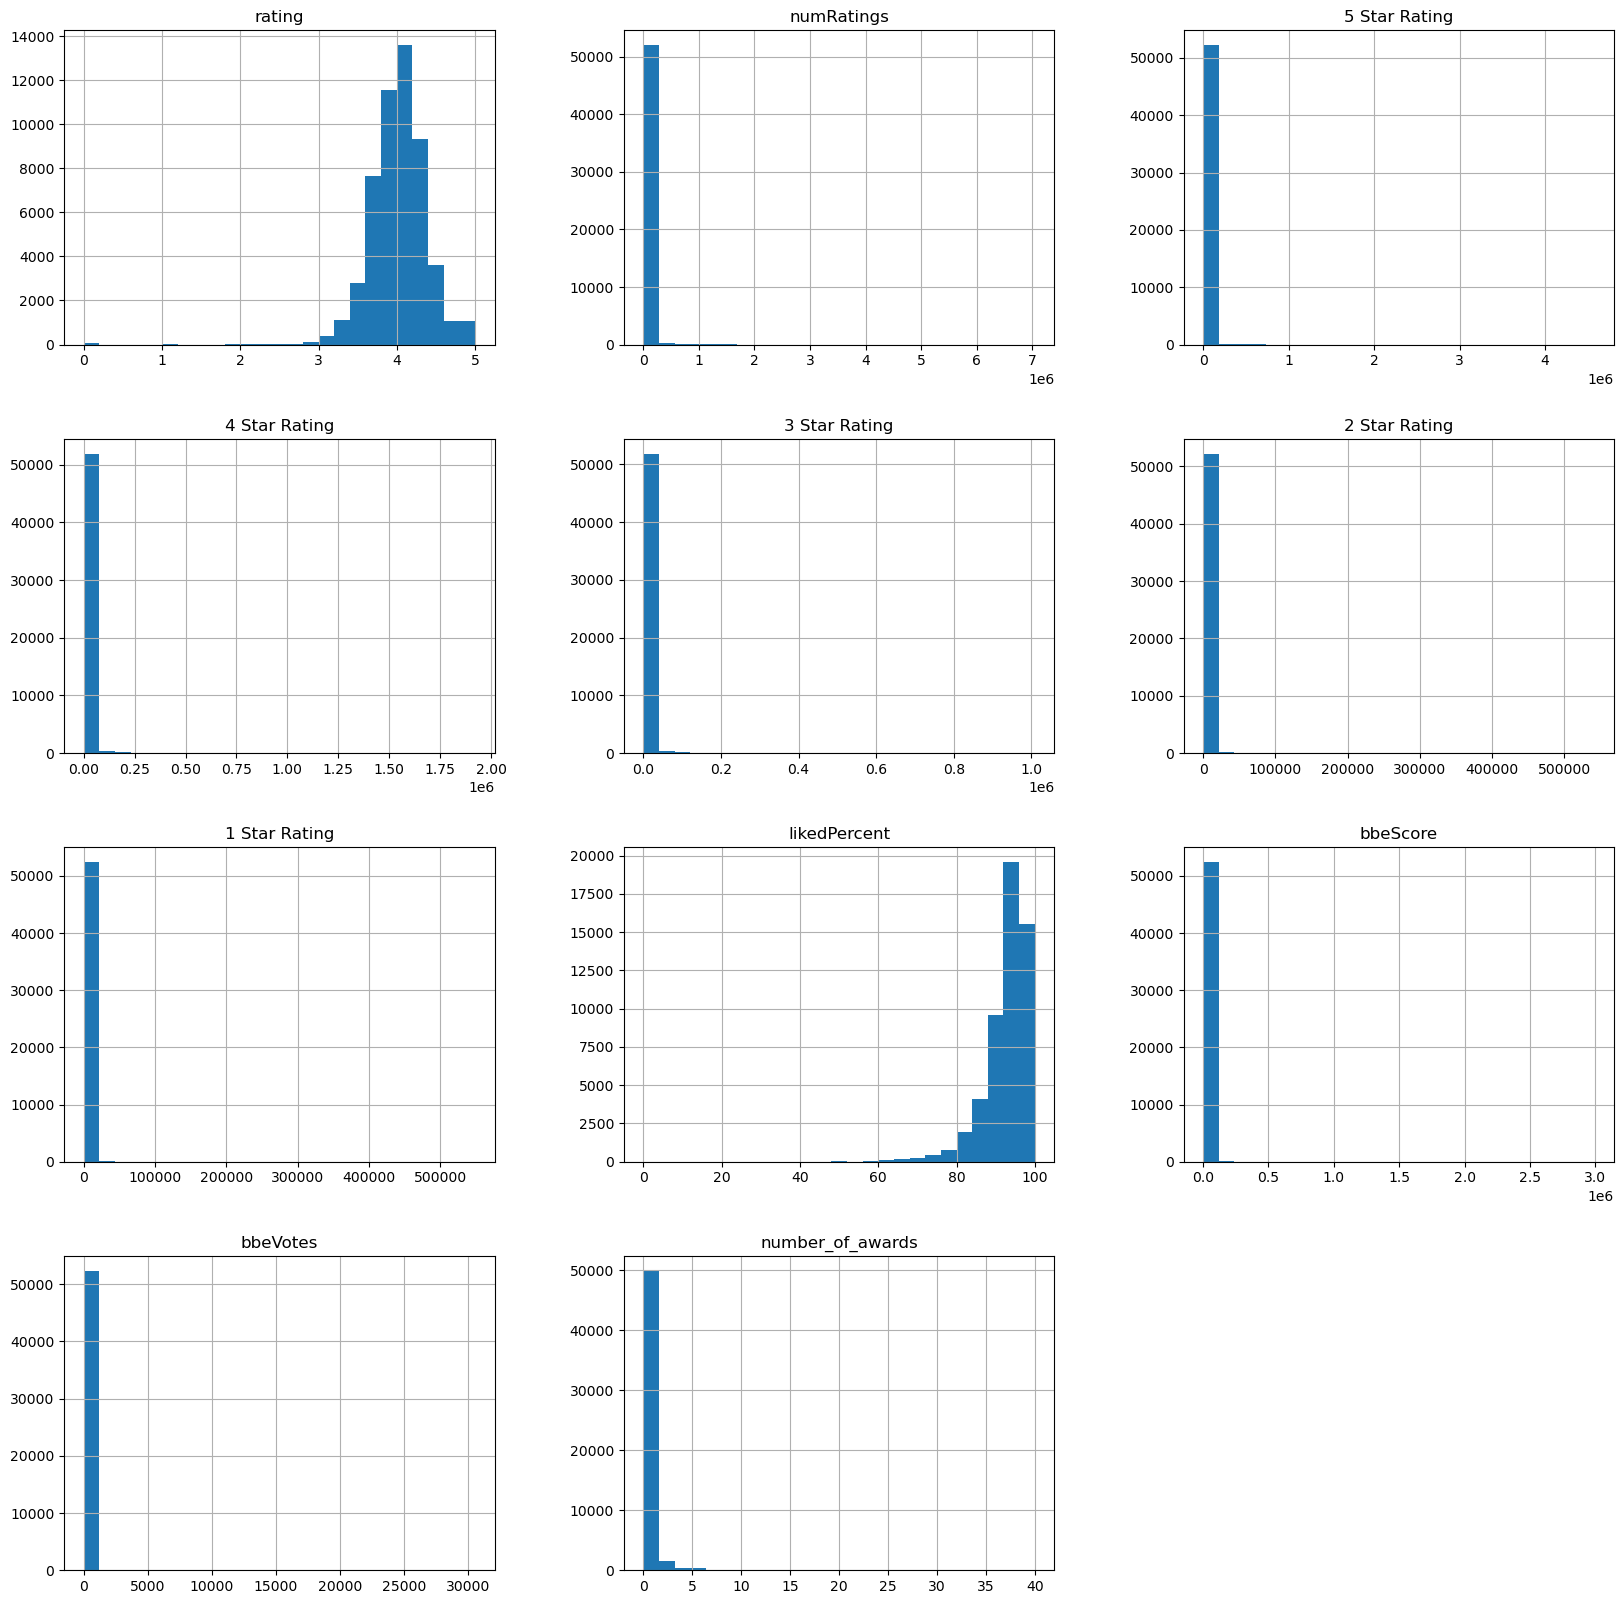

In [28]:
imputed_df.hist(bins=25,figsize=(20,20))
# display histogram
plt.show()

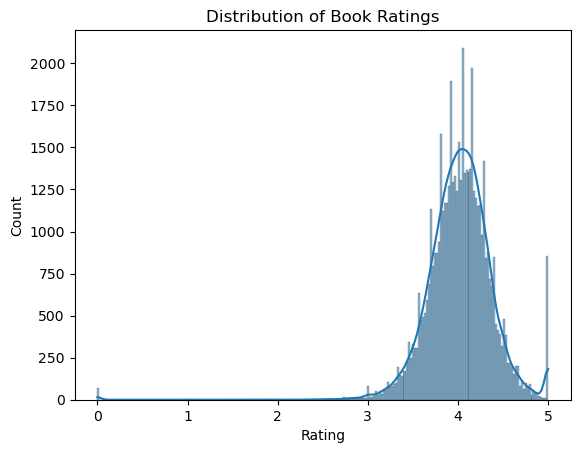

In [22]:
# Distribution of book ratings
sns.histplot(books_data['rating'], kde=True)
plt.title('Distribution of Book Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

**As a part of analysis:**

we could see there are many 4 star ratings compared to other ratings

In [29]:
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt

# Assume 'books_data' is your DataFrame with a single genre column
genre_column = 'genres'  # Replace 'genres' with your actual column name

# Ensure the genre column is treated as string and handle NaN values
books_data[genre_column] = books_data[genre_column].fillna('').astype(str)

# Split the genre column into individual genres and flatten the list
all_genres = books_data[genre_column].str.split(',').sum()

# Clean genres by stripping leading/trailing spaces
all_genres = [genre.strip() for genre in all_genres if genre.strip()]  # Remove empty strings after stripping

# Count the frequency of each genre
genre_counter = Counter(all_genres)

# Get the top 20 genres
top_20_genres = genre_counter.most_common(20)

# Create a DataFrame for the top 20 genres
top_20_genres_df = pd.DataFrame({
    'Genre': [genre for genre, _ in top_20_genres],
    'Count': [count for _, count in top_20_genres]
})

# Calculate the percentage distribution
total_genres = sum(top_20_genres_df['Count'])
top_20_genres_df['Percentage'] = top_20_genres_df['Count'] / total_genres * 100  # Convert to percentage

# Display the top 20 genres and their percentages
print("Top 20 Genres and Their Percentages:")
print(top_20_genres_df)

Top 20 Genres and Their Percentages:
                   Genre  Count  Percentage
0                Fiction   7246   24.614444
1            Young Adult   3179   10.798967
2             Nonfiction   2983   10.133161
3                Romance   2613    8.876282
4                Fantasy   1964    6.671649
5               Classics   1264    4.293770
6     Historical Fiction   1264    4.293770
7           Contemporary   1193    4.052585
8             Paranormal   1040    3.532849
9                Mystery    970    3.295061
10       Science Fiction    790    2.683606
11             Childrens    739    2.510361
12  Contemporary Romance    667    2.265779
13              Thriller    662    2.248794
14             New Adult    512    1.739249
15               History    509    1.729058
16        Graphic Novels    504    1.712073
17             Biography    465    1.579591
18                 Humor    439    1.491270
19          Middle Grade    435    1.477682


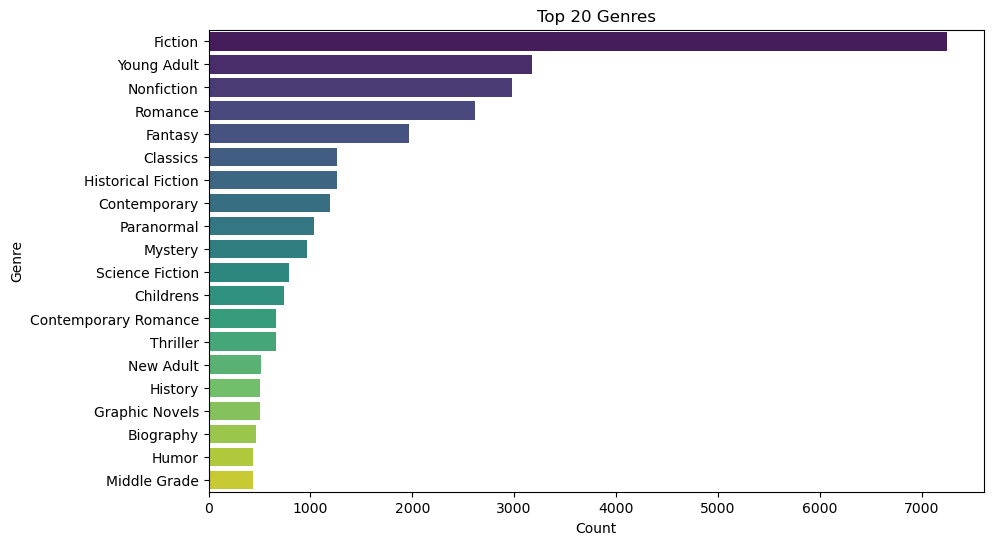

In [24]:
# Plot the top 20 genres
plt.figure(figsize=(10, 6))
sns.barplot(data=top_20_genres_df, x='Count', y='Genre', palette='viridis')
plt.title('Top 20 Genres')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.show()

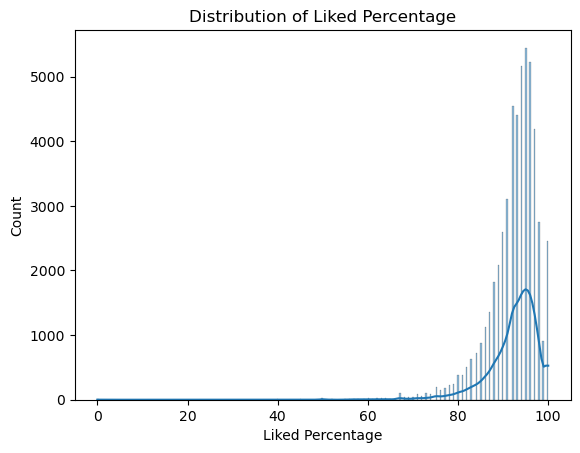

In [25]:
# Distribution of book ratings
sns.histplot(imputed_df['likedPercent'], kde=True)
plt.title('Distribution of Liked Percentage')
plt.xlabel('Liked Percentage')
plt.ylabel('Count')
plt.show()

# Bivariate Analysis

Bivariate analysis is the examination of the relationship between two variables in a dataset. This type of analysis helps to understand how two variables are related, whether they exhibit a correlation, and if one variable influences or predicts another. Bivariate analysis is often a key step in data analysis, providing insights into potential patterns, trends, or associations that might exist between variables.

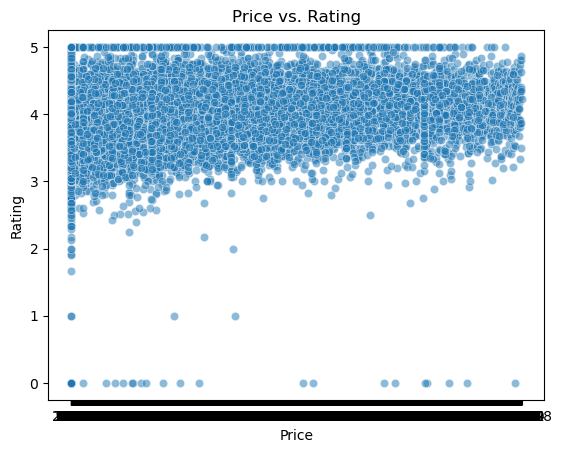

In [30]:
# Scatter Plot (e.g., between 'price' and 'rating')
sns.scatterplot(data=imputed_df, x='price', y='rating', alpha=0.5)
plt.title('Price vs. Rating')
plt.xlabel('Price')
plt.ylabel('Rating')
plt.show()

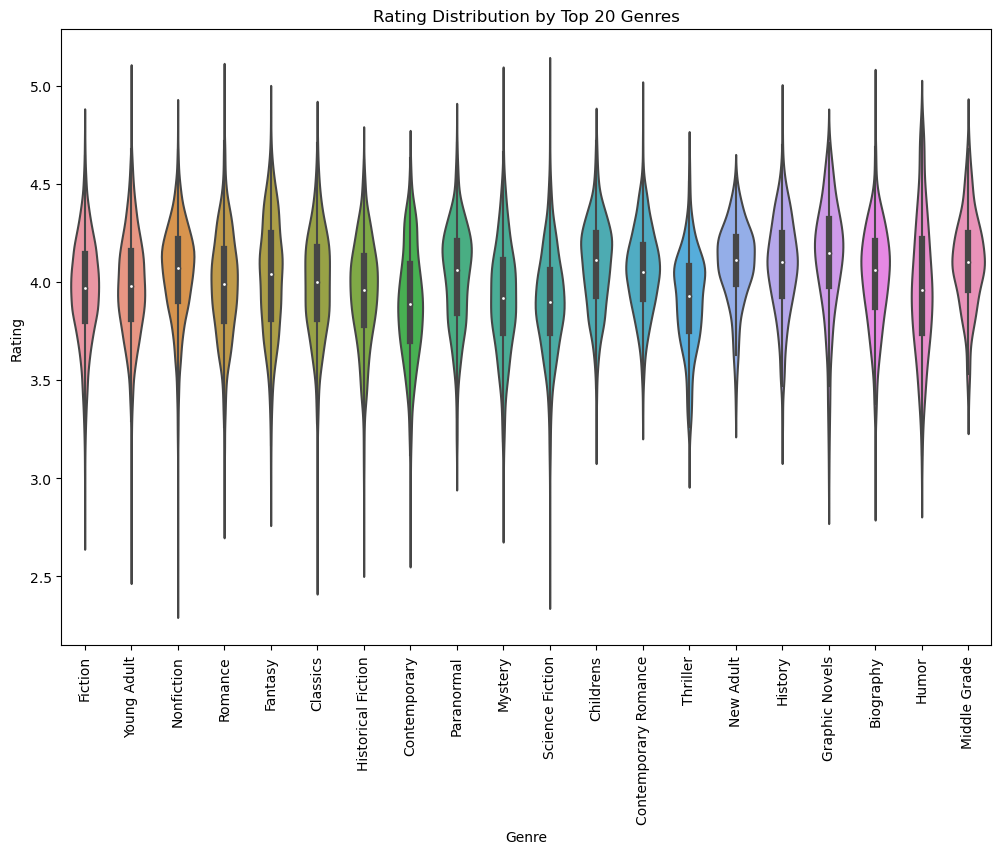

In [34]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter

# Assume 'books_data' is your DataFrame with a single genre column
genre_column = 'genres'  # Replace 'genres' with your actual column name

# Ensure the genre column is treated as string and handle NaN values
books_data[genre_column] = books_data[genre_column].fillna('').astype(str)

# Split the genre column into individual genres and flatten the list
all_genres = books_data[genre_column].str.split(',').sum()

# Clean genres by stripping leading/trailing spaces
all_genres = [genre.strip() for genre in all_genres if genre.strip()]  # Remove empty strings after stripping

# Count the frequency of each genre
genre_counter = Counter(all_genres)

# Get the top 20 genres
top_20_genres = genre_counter.most_common(20)

# Extract the top 20 genre names
top_20_genres_names = [genre for genre, _ in top_20_genres]

# Create a list to store all genre-rating pairs
genre_rating_pairs = []

# Loop through each genre and collect corresponding ratings
for genre, rating in zip(books_data[genre_column], books_data['rating']):
    if genre.strip() and genre.strip() in top_20_genres_names:  # Avoid empty genres and consider only top 20 genres
        genre_rating_pairs.append({'Genre': genre.strip(), 'Rating': rating})

# Create a DataFrame for genre-rating pairs
genre_rating_df = pd.DataFrame(genre_rating_pairs)

# Create a violin plot for 'Rating' by top 20 'Genre'
plt.figure(figsize=(12, 8))
sns.violinplot(data=genre_rating_df, x='Genre', y='Rating', order=top_20_genres_names)
plt.title('Rating Distribution by Top 20 Genres')
plt.xlabel('Genre')
plt.ylabel('Rating')
plt.xticks(rotation=90)  # Rotate for readability
plt.show()


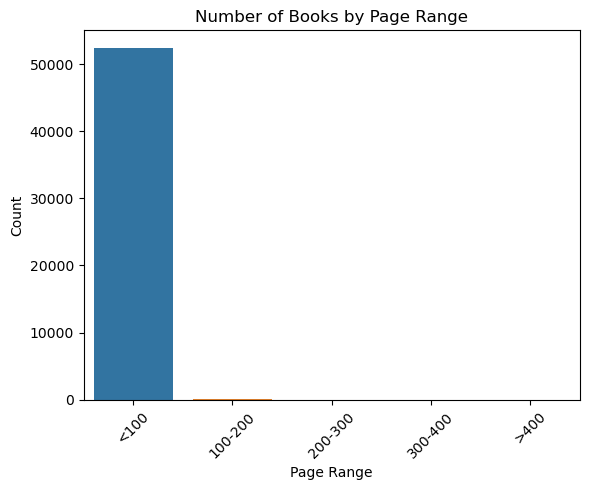

In [32]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure 'pages' is in the DataFrame and has correct data type
if 'pages' in imputed_df.columns:
    # Convert 'pages' to numeric, with errors='coerce' to convert non-numeric values to NaN
    imputed_df['pages'] = pd.to_numeric(imputed_df['pages'], errors='coerce')

    # Handle NaN or invalid values by filling with a default value or dropping them
    imputed_df['pages'].fillna(imputed_df['pages'].median(), inplace=True)  # Fill NaN with median
    
    # Ensure there are no infinite values
    imputed_df = imputed_df[~imputed_df['pages'].isin([float('inf'), float('-inf')])]

    # Create 'page_range' based on 'pages'
    imputed_df['page_range'] = pd.cut(imputed_df['pages'], bins=5, labels=['<100', '100-200', '200-300', '300-400', '>400'])

    # Bar graph to show the frequency of 'page_range'
    sns.countplot(data=imputed_df, x='page_range', order=imputed_df['page_range'].value_counts().index)
    plt.title('Number of Books by Page Range')
    plt.xlabel('Page Range')
    plt.ylabel('Count')
    plt.xticks(rotation=45)  # Rotate for readability
    plt.show()
else:
    print("Error: 'pages' column not found in DataFrame.")

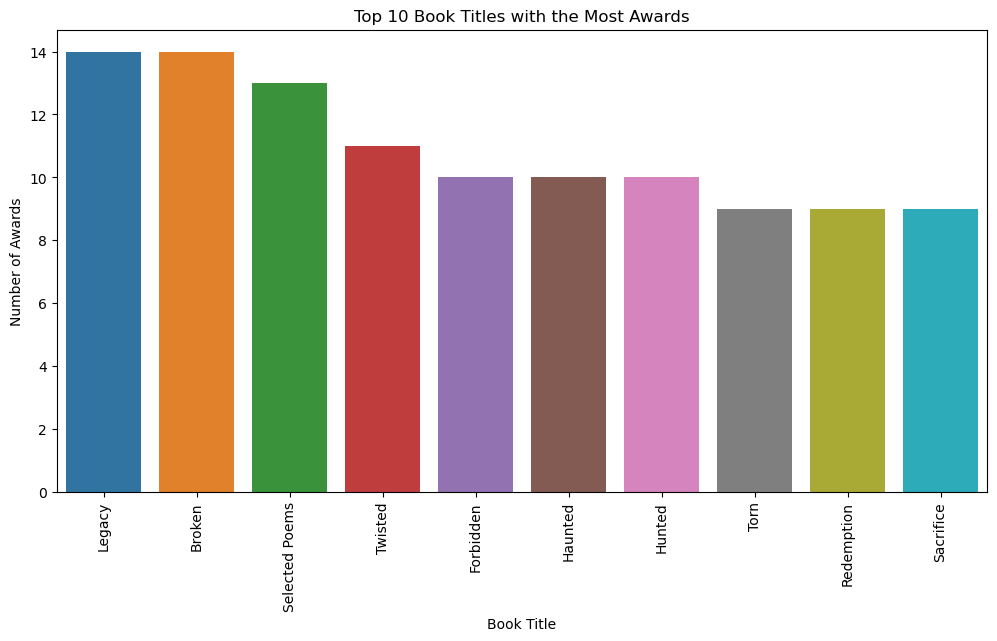

In [33]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Check if 'title' and 'awards' columns exist
if 'title' in imputed_df.columns and 'awards' in imputed_df.columns:
    # Group by 'title' and count the number of awards
    awards_by_title = imputed_df.groupby('title')['awards'].count()

    # Sort to get the top 10 titles with the most awards
    top_10_titles = awards_by_title.sort_values(ascending=False).head(10)

    # Create a bar graph with 'title' on the x-axis and 'awards' on the y-axis for the top 10 titles
    plt.figure(figsize=(12, 6))
    sns.barplot(x=top_10_titles.index, y=top_10_titles.values)
    plt.title('Top 10 Book Titles with the Most Awards')
    plt.xlabel('Book Title')
    plt.ylabel('Number of Awards')
    plt.xticks(rotation=90)  # Rotate for readability
    plt.show()
else:
    print("Error: 'title' or 'awards' column not found in DataFrame.")


# Multivariate Analysis

Multivariate analysis involves examining relationships among three or more variables in a dataset. This type of analysis allows for a more comprehensive understanding of complex data structures and can reveal interactions and patterns that wouldn't be apparent through univariate or bivariate analysis. Multivariate analysis is crucial in many fields, including statistics, machine learning, and data science, because real-world phenomena often involve multiple interrelated factors.

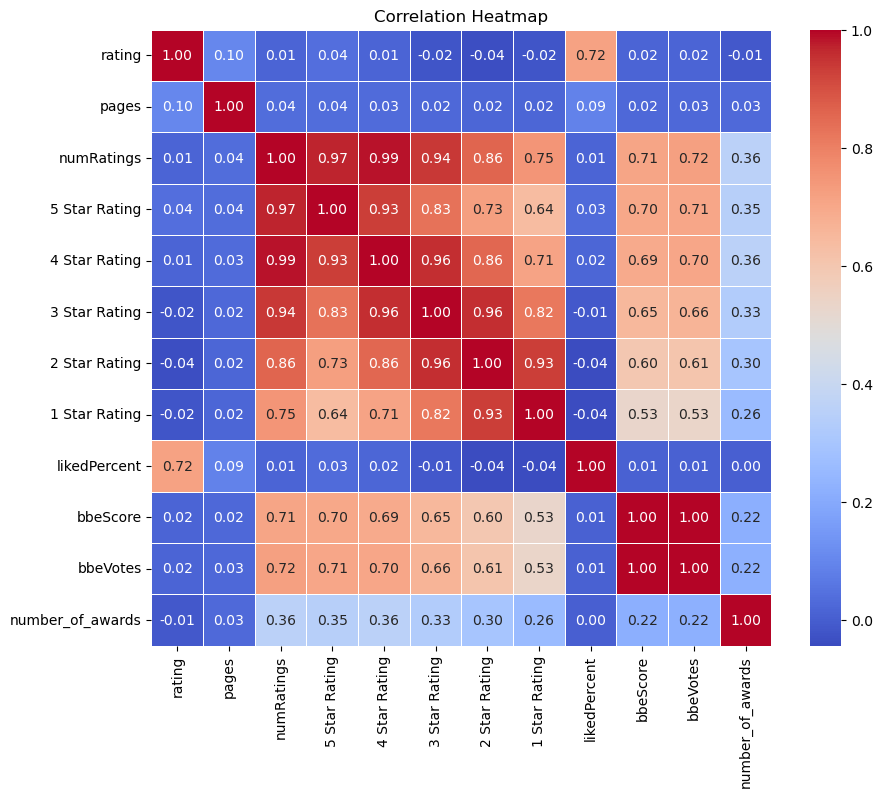

In [30]:
# Step 1: Identify numerical columns
numeric_columns = imputed_df.select_dtypes(include=[int, float]).columns

# Step 2: Calculate correlations using only numerical columns
corr = imputed_df[numeric_columns].corr()

# Step 3: Plot the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

<Figure size 1200x1200 with 0 Axes>

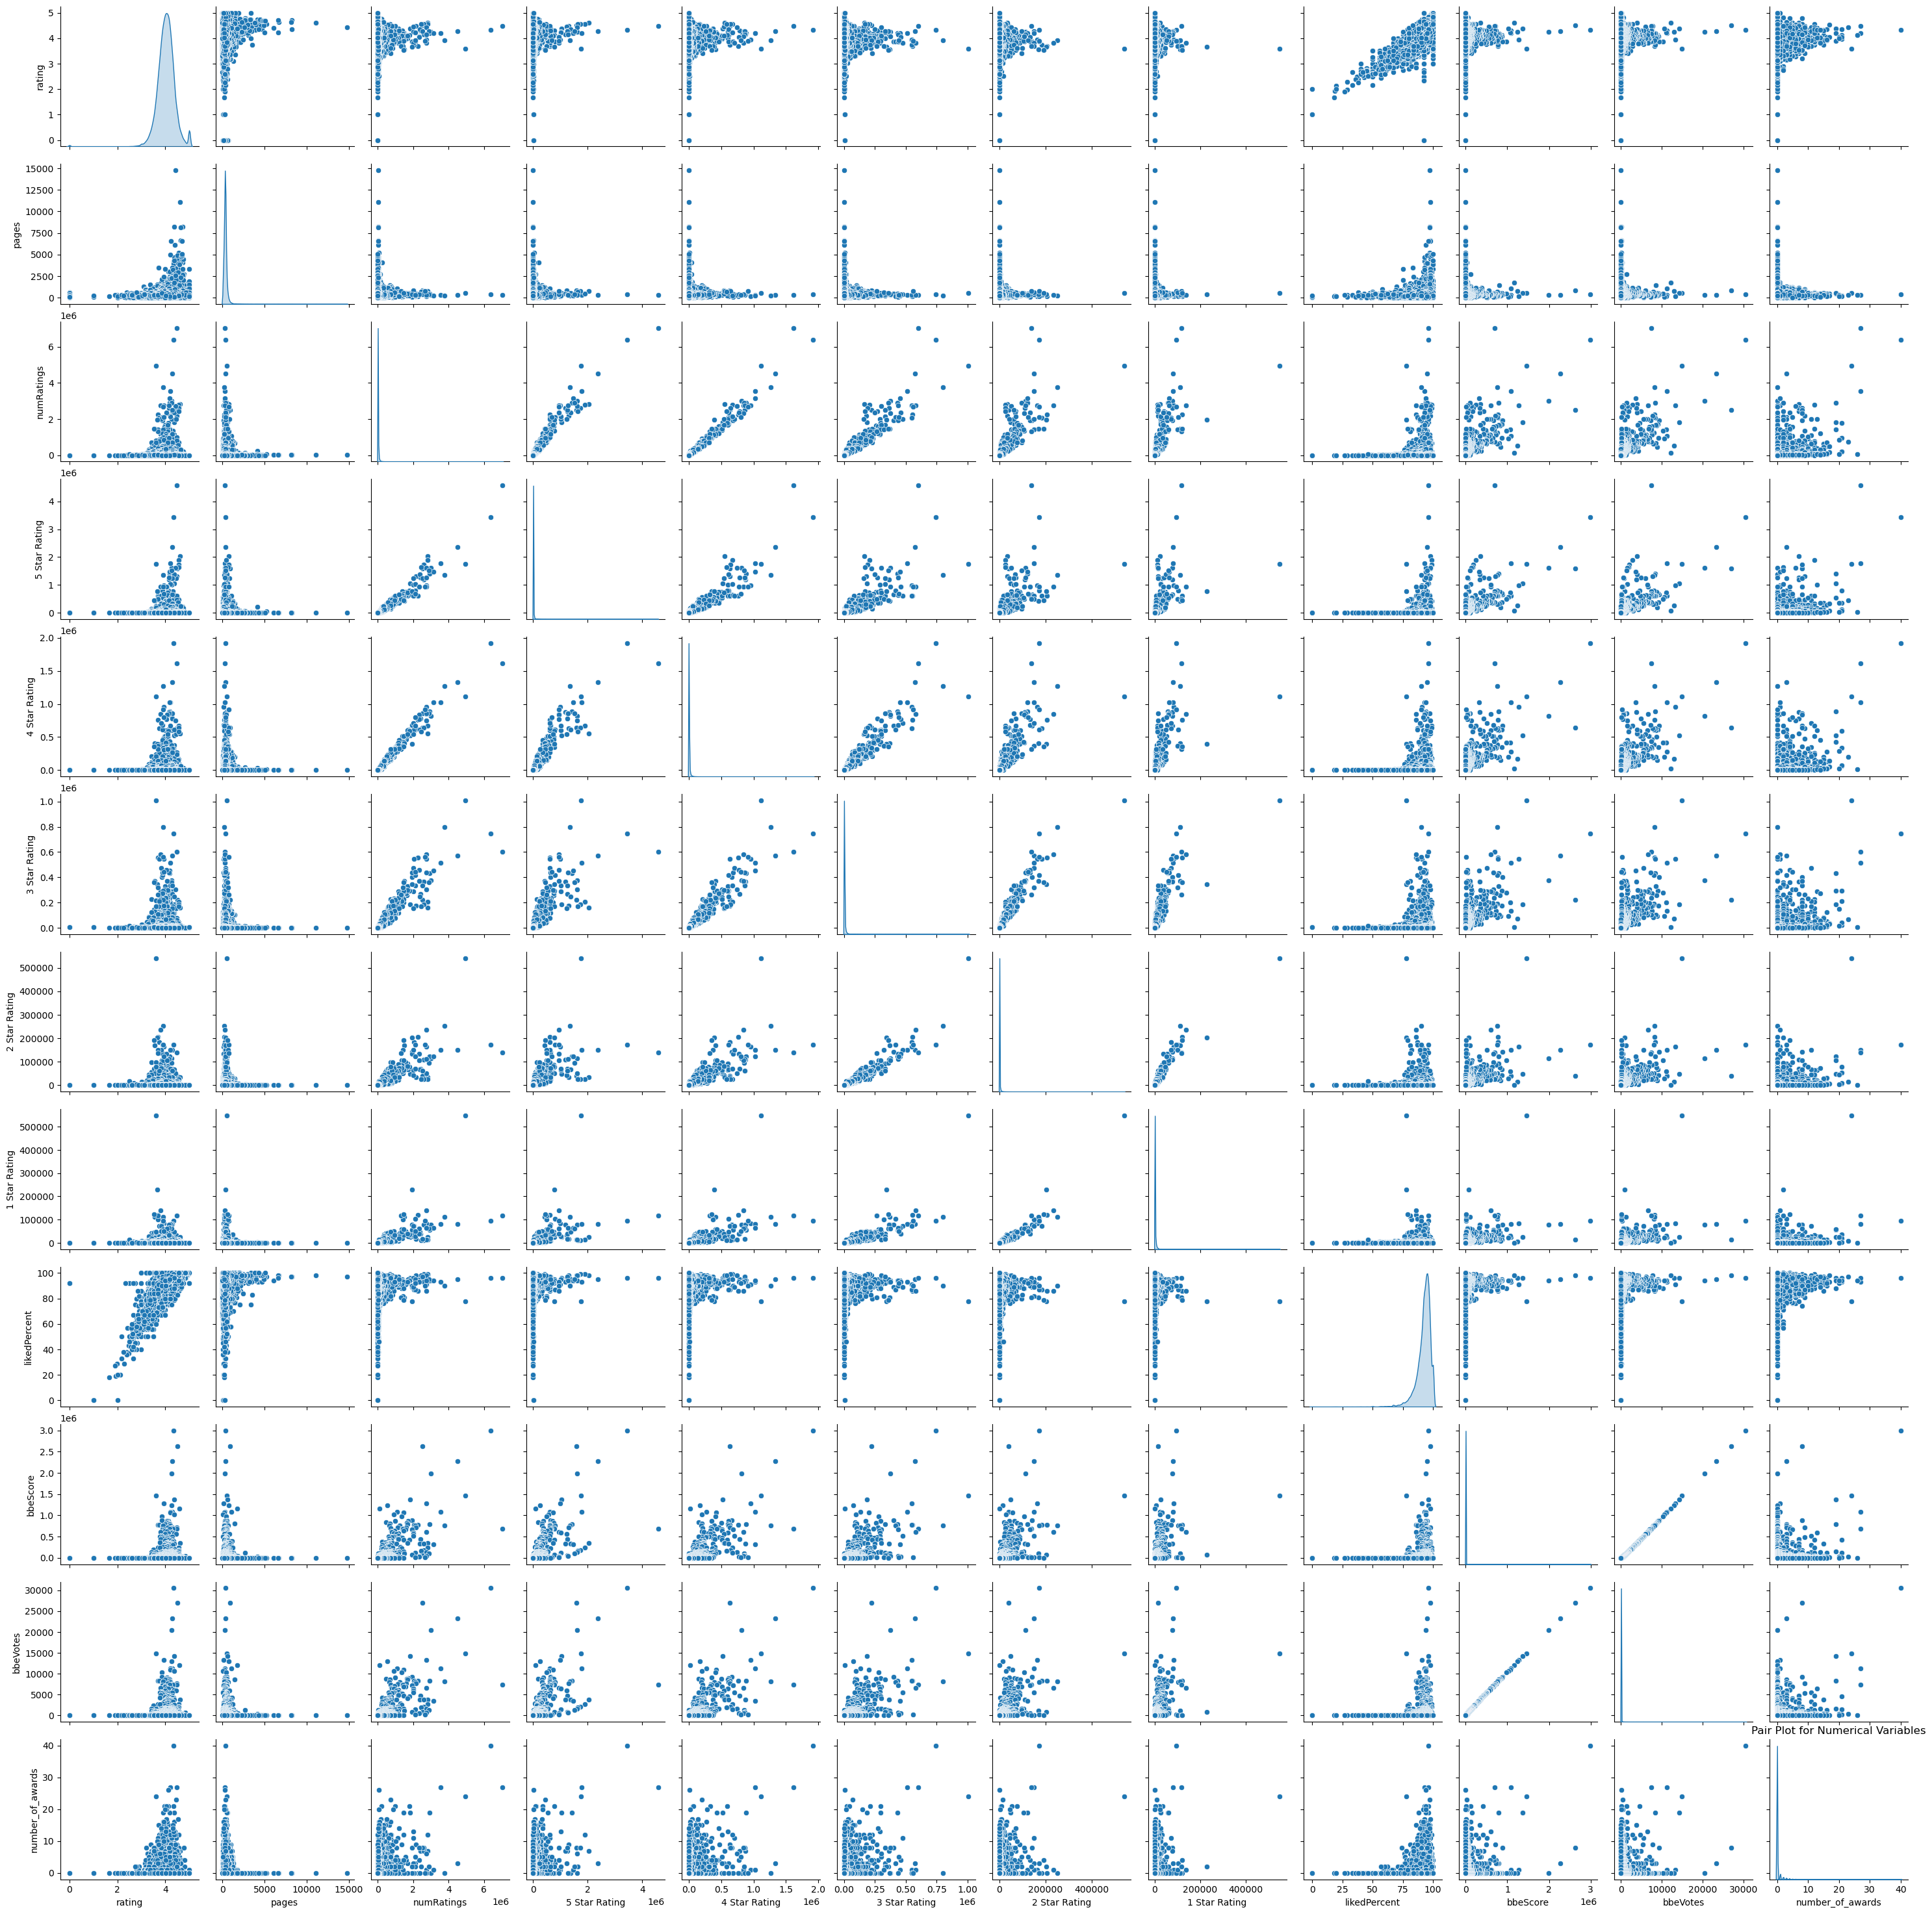

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Select only the numerical columns from the DataFrame
# Assuming 'imputed_df' is your DataFrame with mixed data types
numeric_columns = imputed_df.select_dtypes(include=[int, float]).columns

# Create a pair plot with the numerical columns
plt.figure(figsize=(12, 12))  # Adjust size as needed
sns.pairplot(imputed_df[numeric_columns], diag_kind='kde')  # KDE for diagonal plots
plt.title('Pair Plot for Numerical Variables')
plt.show()

**Box Plot**

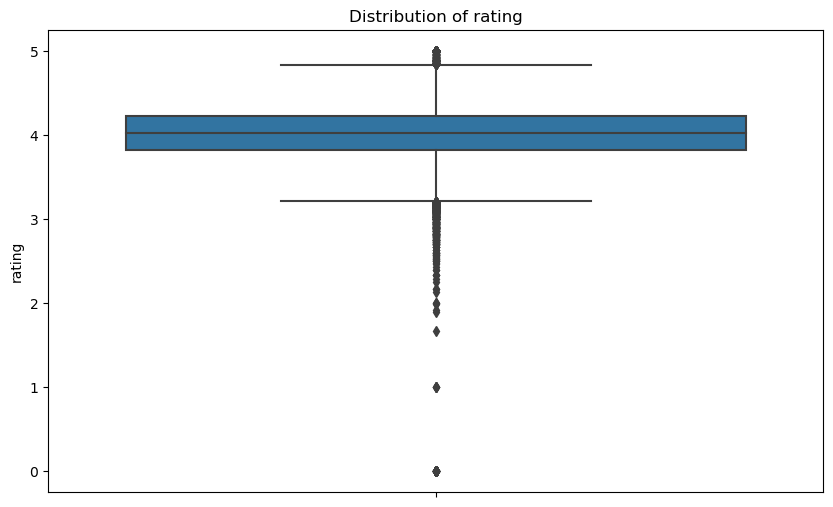

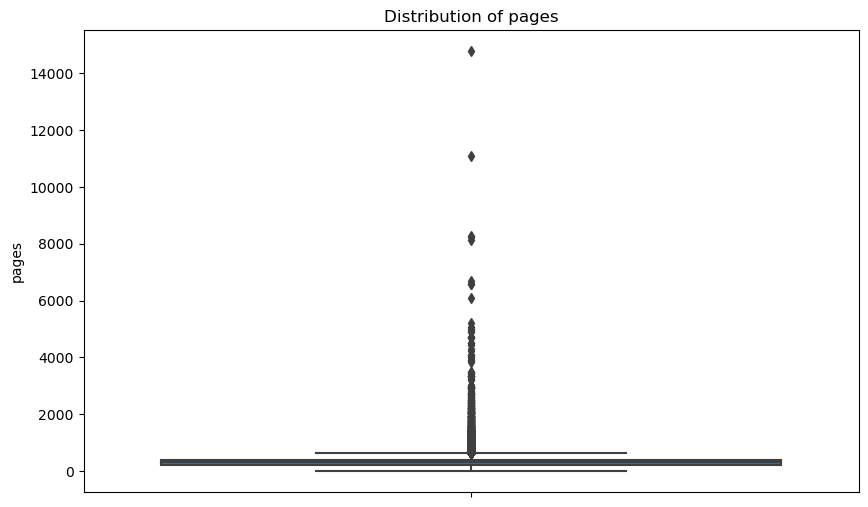

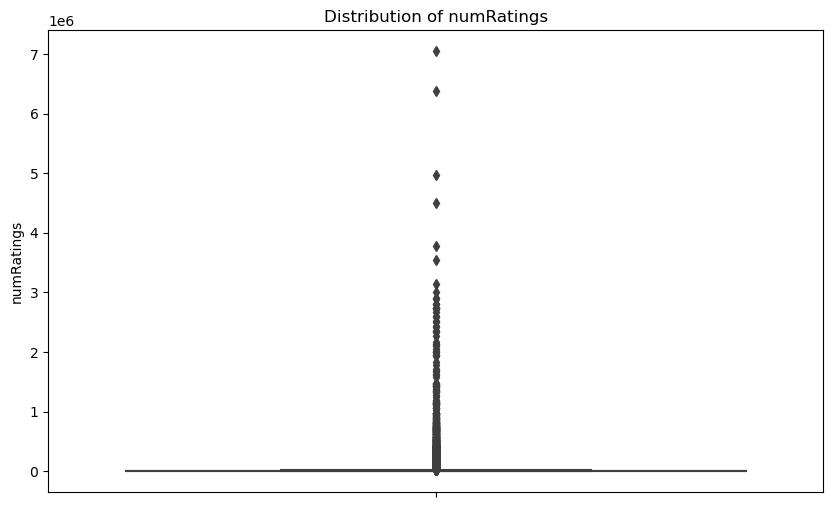

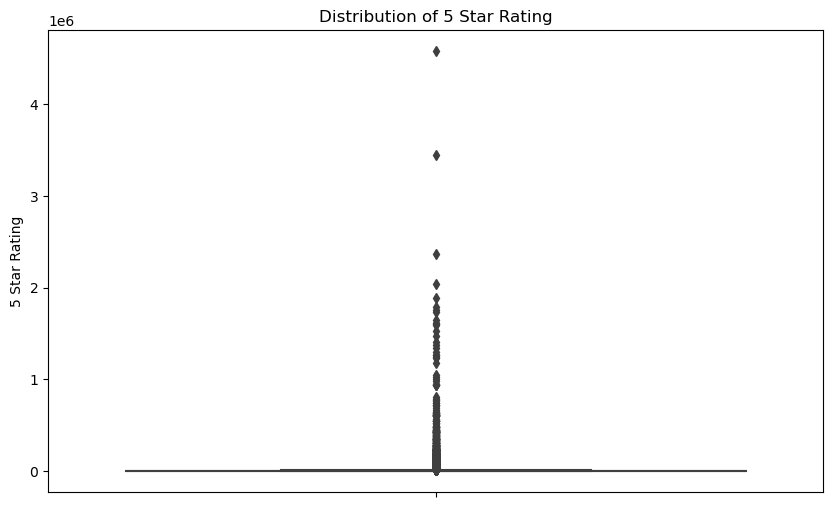

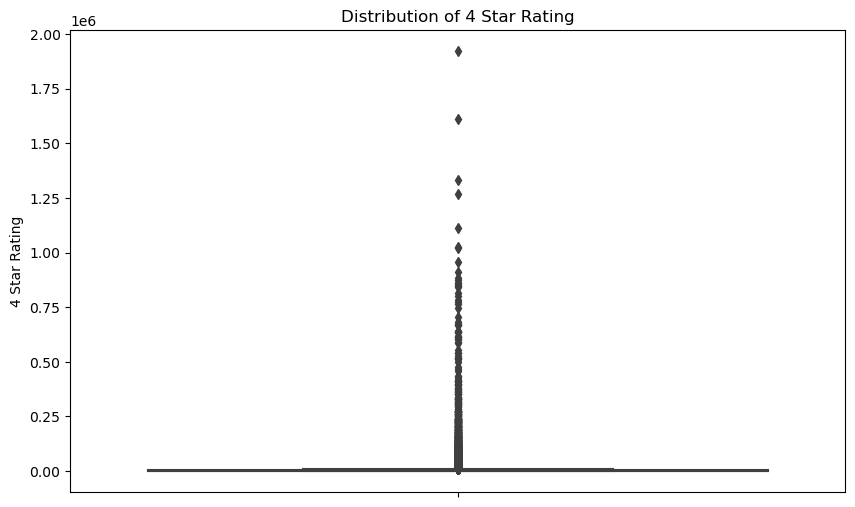

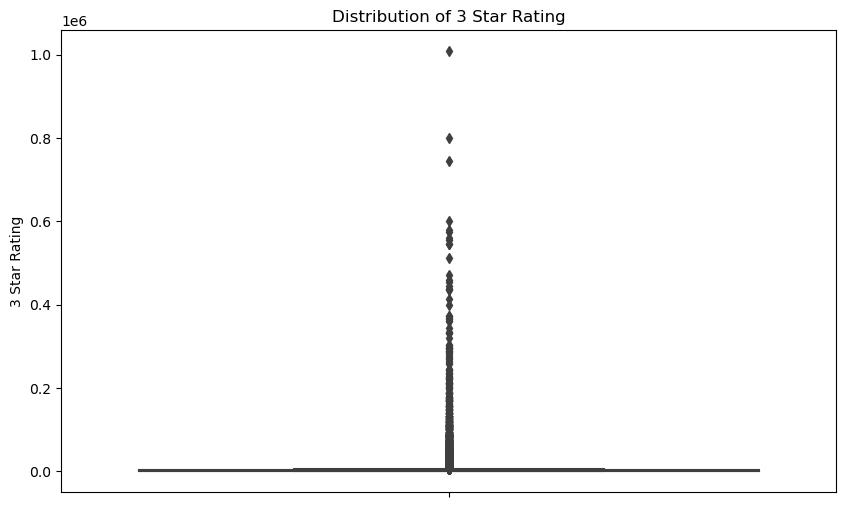

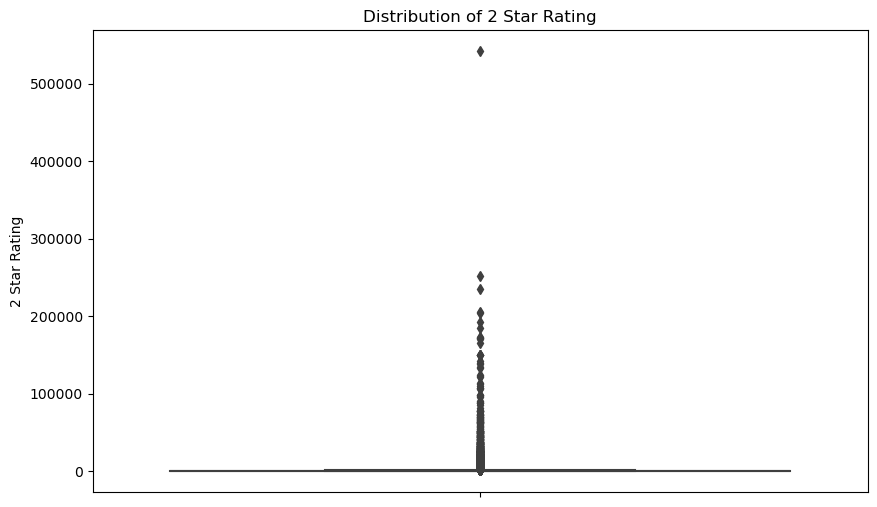

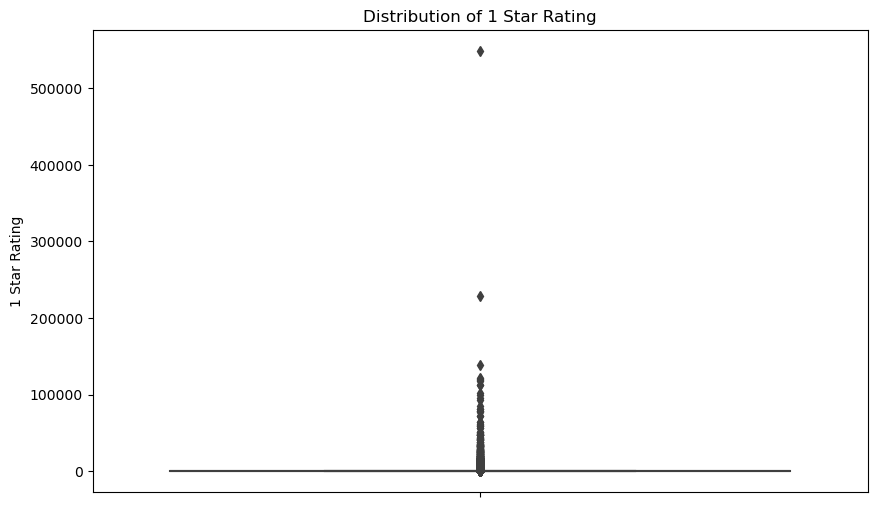

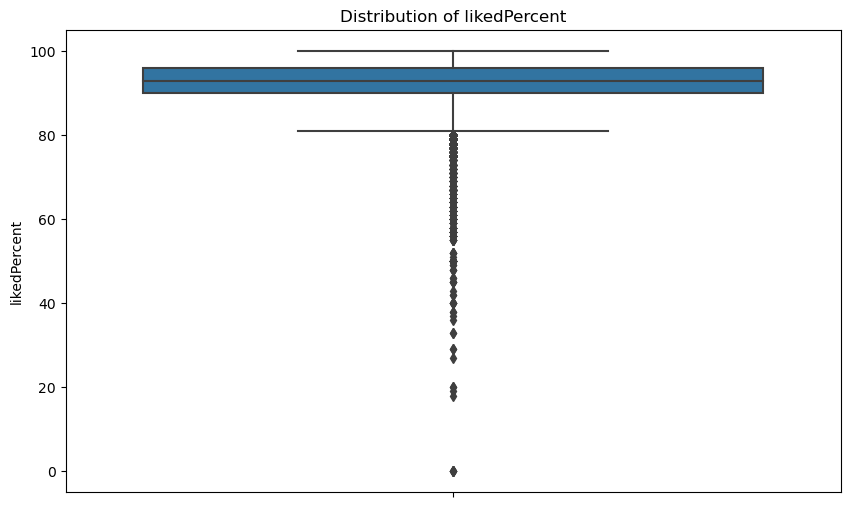

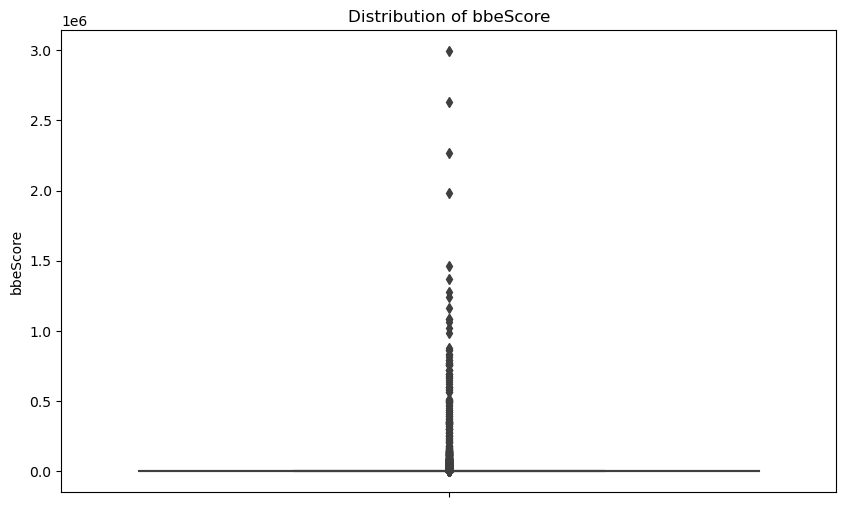

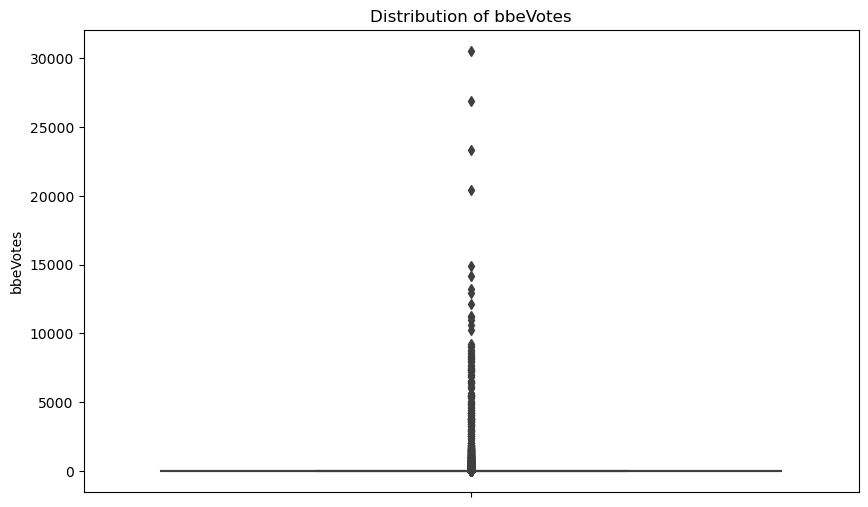

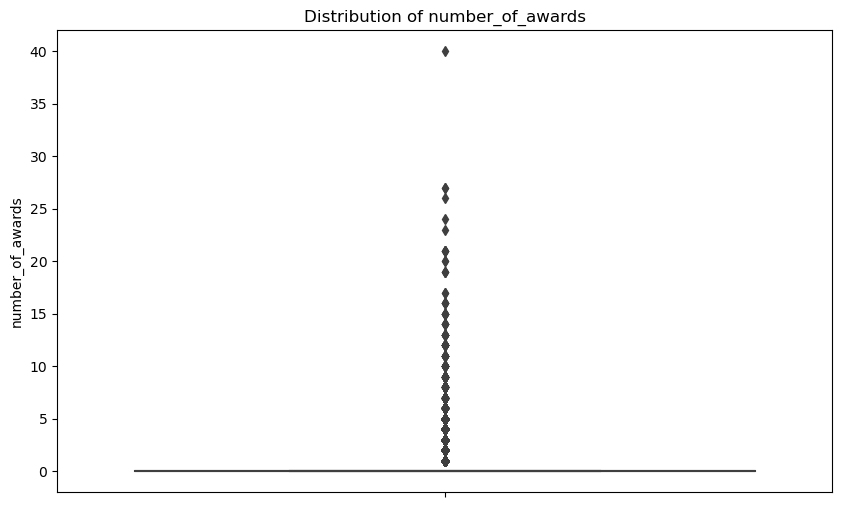

In [32]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numerical columns for box plots
numerical_columns = imputed_df.select_dtypes(include=[int, float]).columns

# Create box plots for all numerical columns
for column in numerical_columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(y=imputed_df[column])  # Box plot for each numerical column
    plt.title(f'Distribution of {column}')
    plt.xlabel('')  # No need for x-axis label for single box plot
    plt.ylabel(column)  # Set y-axis label to column name
    plt.show()


Since above columns has count values we couldnt handle outliers except pages columns

**Handling Outliers**

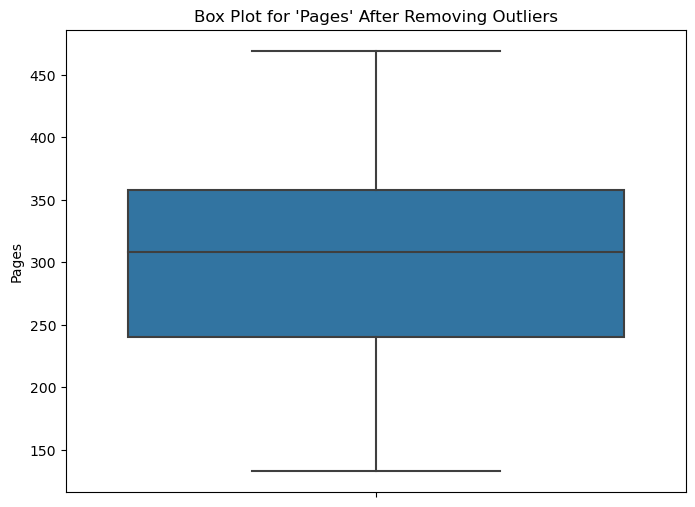

In [33]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Function to remove outliers from 'pages' using a stricter IQR
def remove_outliers_strict(df, column, multiplier=0.5):
    Q1 = df[column].quantile(0.25)  # First quartile
    Q3 = df[column].quantile(0.75)  # Third quartile
    IQR = Q3 - Q1

    lower_bound = Q1 - multiplier * IQR  # Stricter lower bound
    upper_bound = Q3 + multiplier * IQR  # Stricter upper bound

    # Return DataFrame without outliers in 'pages'
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Create a copy of the DataFrame to preserve the original data
df_no_outliers = imputed_df.copy()

# Remove outliers from the 'pages' column using the strict IQR approach
df_no_outliers = remove_outliers_strict(df_no_outliers, 'pages', multiplier=0.5)

# Create a box plot for 'pages' after removing outliers
plt.figure(figsize=(8, 6))
sns.boxplot(y=df_no_outliers['pages'])
plt.title("Box Plot for 'Pages' After Removing Outliers")
plt.ylabel('Pages')  # y-axis represents the 'pages' distribution
plt.show()


# Prepped Data Review

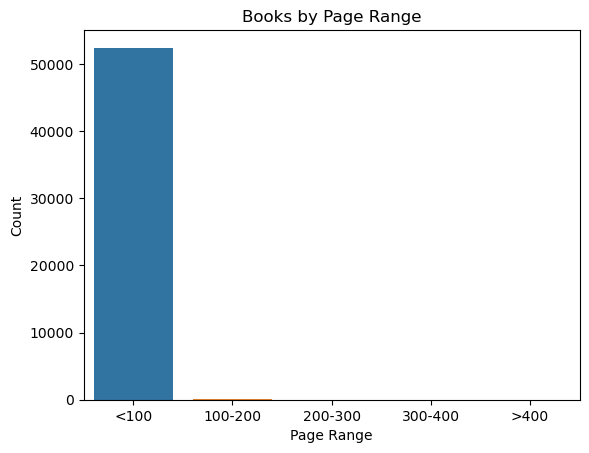

In [35]:
sns.countplot(x='page_range', data=imputed_df)
plt.title("Books by Page Range")
plt.xlabel("Page Range")
plt.ylabel("Count")
plt.show()


In [37]:
#dropping highly correlated colum num ratings
# Dropping highly correlated column 'numRatings'
imputed_df = imputed_df.drop(columns=['numRatings'])

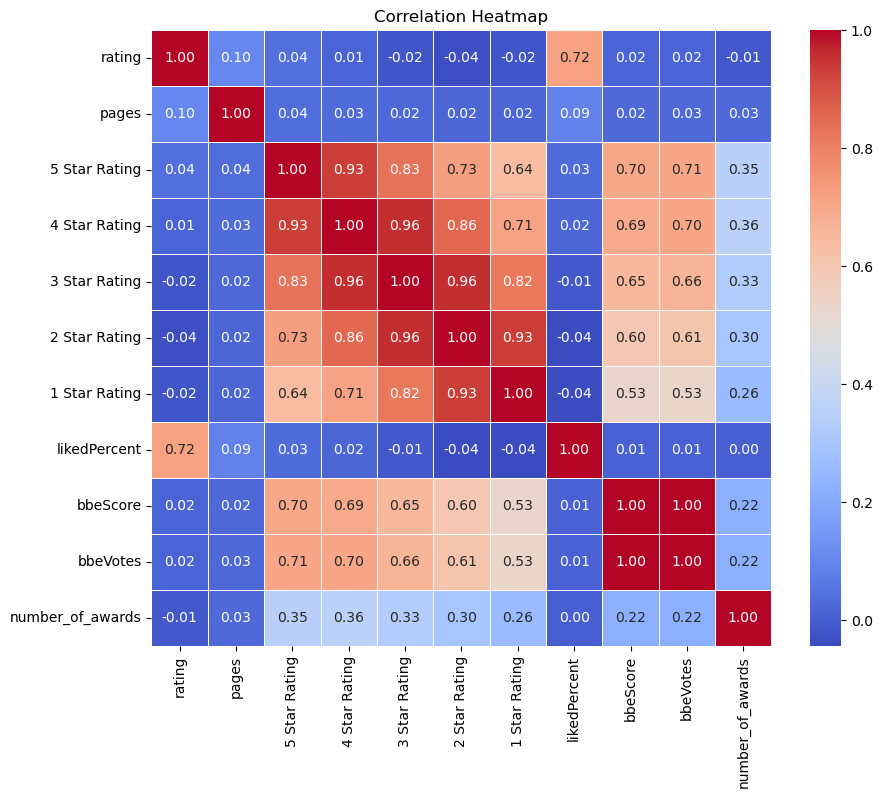

In [39]:
# Step 1: Identify numerical columns
numeric_columns = imputed_df.select_dtypes(include=[int, float]).columns

# Step 2: Calculate correlations using only numerical columns
corr = imputed_df[numeric_columns].corr()

# Step 3: Plot the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

**Data Exploration and Univariate Analysis:**
- The countplot for page_range showed the distribution of books based on the number of pages, highlighting the most common page ranges in the dataset.

**Handling Highly Correlated Variables:**
- Given the high correlation between certain columns, the numRatings column was dropped to avoid multicollinearity, simplifying the data and reducing redundancy in further analyses.

**Correlation Analysis and Heatmaps:**
- A correlation matrix was calculated to examine relationships between numerical variables. This step identified the level of correlation among variables, providing insights into which variables have strong or weak relationships.

**Outlier Detection and Removal:**
- To ensure clean data, outliers in specific columns (like pages) were removed using a stricter Interquartile Range (IQR) approach. This process helps in obtaining more accurate and reliable insights from the dataset.

# Dimensionality Reduction

Dimensionality reduction is a process in data analysis and machine learning where the number of input variables (or features) is reduced to simplify the dataset without losing significant information. This technique is especially useful when dealing with high-dimensional data, which can be complex, noisy, and prone to overfitting. By reducing the dimensionality, you can improve the efficiency of analysis, reduce computational costs, and enhance model generalization.

In [35]:
import pandas as pd
from sklearn.impute import SimpleImputer

# Step 1: Identify non-numeric columns
non_numeric_columns = imputed_df.select_dtypes(exclude=['number']).columns

# Step 2: Remove non-numeric columns or encode them

numeric_data = imputed_df.drop(columns=non_numeric_columns)

# Step 3: Apply imputation
imputer = SimpleImputer(strategy='mean')
numeric_data_imputed = imputer.fit_transform(numeric_data)

# Step 4: Convert the imputed data back to a DataFrame
numeric_data_imputed_df = pd.DataFrame(numeric_data_imputed, columns=numeric_data.columns)



Principal Component Analysis (PCA) is a linear dimensionality reduction technique used in data analysis and machine learning. It transforms high-dimensional data into a smaller number of dimensions, capturing the most important information while reducing complexity. PCA achieves this by identifying the principal components, which are the directions of maximum variance in the data.

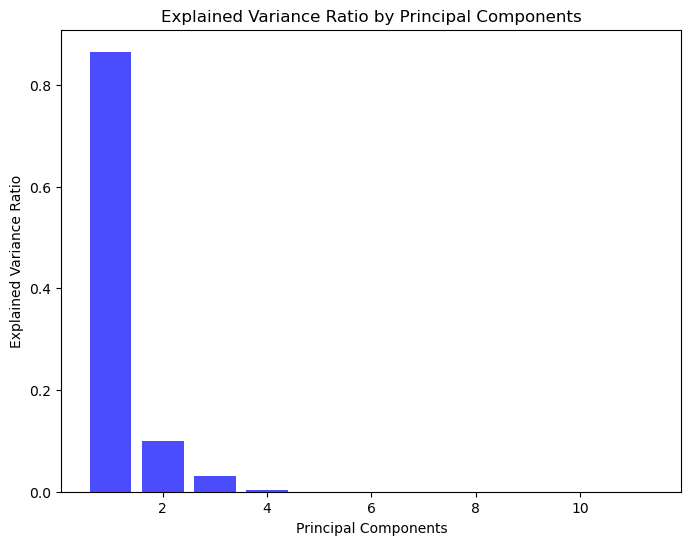

In [36]:
# Step 5: Apply PCA
pca = PCA()
X_pca = pca.fit_transform(numeric_data_imputed_df)

# Step 6: Plot the explained variance ratio
plt.figure(figsize=(8, 6))
plt.bar(range(1, pca.n_components_ + 1), pca.explained_variance_ratio_, color='b', alpha=0.7)
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio by Principal Components')
plt.show()

In [37]:
imputed_df

,bookId,title,series,author,rating,description,language,genres,characters,bookFormat,...,4 Star Rating,3 Star Rating,2 Star Rating,1 Star Rating,likedPercent,bbeScore,bbeVotes,price,number_of_awards,page_range
0,2767052,The Hunger Games,The Hunger Games #1,Suzanne Collins,4.33,WINNING MEANS FAME AND FORTUNE.LOSING MEANS CE...,English,Fiction,"['Katniss Everdeen', 'Peeta Mellark', 'Cato (H...",Hardcover,...,1921313.0,745221.0,171994.0,93557.0,96.0,2993816.0,30516.0,5.09,40.0,<100
1,2,Harry Potter and the Order of the Phoenix,Harry Potter #5,J.K. Rowling,4.50,There is a door at the end of a silent corrido...,English,Young Adult,"['Sirius Black', 'Draco Malfoy', 'Ron Weasley'...",Paperback,...,637516.0,222366.0,39573.0,14526.0,98.0,2632233.0,26923.0,7.38,8.0,<100
2,2657,To Kill a Mockingbird,To Kill a Mockingbird,Harper Lee,4.28,The unforgettable novel of a childhood in a sl...,English,Fiction,"['Scout Finch', 'Atticus Finch', 'Jem Finch', ...",Paperback,...,1333153.0,573280.0,149952.0,80794.0,95.0,2269402.0,23328.0,5.2,3.0,<100
3,1885,Pride and Prejudice,Star Wars Legends,Jane Austen,4.26,Alternate cover edition of ISBN 9780679783268S...,English,Fiction,"['Mr. Bennet', 'Mrs. Bennet', 'Jane Bennet', '...",Paperback,...,816659.0,373311.0,113934.0,76770.0,94.0,1983116.0,20452.0,5.2,0.0,<100
4,41865,Twilight,The Twilight Saga #1,Stephenie Meyer,3.60,About three things I was absolutely positive.\...,English,Fantasy,"['Edward Cullen', 'Jacob Black', 'Laurent', 'R...",Paperback,...,1113682.0,1008686.0,542017.0,548674.0,78.0,1459448.0,14874.0,2.1,24.0,<100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52473,11492014,Fractured,Fateful #2,Cheri Schmidt (Goodreads Author),4.00,The Fateful Trilogy continues with Fractured. ...,English,Paranormal,[],Nook,...,310.0,197.0,42.0,11.0,94.0,0.0,1.0,5.2,0.0,<100
52474,11836711,Anasazi,Sense of Truth #2,Emma Michaels,4.19,"'Anasazi', sequel to 'The Thirteenth Chime' by...",English,Young Adult,[],Paperback,...,14.0,5.0,2.0,0.0,95.0,0.0,1.0,5.2,0.0,<100
52475,10815662,Marked,Soul Guardians #1,Kim Richardson (Goodreads Author),3.70,--READERS FAVORITE AWARDS WINNER 2011--Sixteen...,English,Young Adult,[],Paperback,...,1868.0,1660.0,647.0,390.0,84.0,0.0,1.0,7.37,0.0,<100
52476,11330278,Wayward Son,Star Wars Legends,Tom Pollack (Goodreads Author),3.85,A POWERFUL TREMOR UNEARTHS AN ANCIENT SECRETBu...,English,Mystery,[],Paperback,...,78.0,59.0,19.0,5.0,90.0,0.0,1.0,2.86,0.0,<100


# Research Questions 

# 1. Finding out Genre through NLP and Machine Learning Models.

**Data Preprocessing**

In [39]:
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re
import pandas as pd
import numpy as np

# Function to clean and preprocess text
def preprocess_text(text):
    # Handle NaN/Null values
    if pd.isnull(text):
        return ""
    
    # Convert to string (to avoid issues with non-string types)
    text = str(text).lower()  # Convert text to lowercase
    
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    
    # Remove numbers
    text = re.sub(r'\d+', '', text)
    
    # Tokenize the text
    tokens = word_tokenize(text)
    
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in tokens if word not in stop_words]
    
    # Join tokens back into text
    preprocessed_text = ' '.join(filtered_tokens)
    
    return preprocessed_text

# List of columns containing text data
text_columns = ['description', 'author', 'title']

# Ensure the columns exist in the DataFrame
existing_columns = [col for col in text_columns if col in imputed_df.columns]

# Apply preprocessing to each text column
for col in existing_columns:
    # Convert to string and handle NaN values
    imputed_df[col] = imputed_df[col].fillna("").astype(str)
    imputed_df[f'clean_{col}'] = imputed_df[col].apply(preprocess_text)


In [40]:
from sklearn.preprocessing import LabelEncoder


# Encode the target labels (genres)
label_encoder = LabelEncoder()
imputed_df['genre_encoded'] = label_encoder.fit_transform(imputed_df['genres'])


In [41]:
# Assuming  a DataFrame named 'imputed_df' with 'description', 'author', and 'title' columns
X_description = imputed_df['description'].astype(str).values
X_author = imputed_df['author'].astype(str).values
X_title = imputed_df['title'].astype(str).values
y = imputed_df['genres'].values


# Model Building

## **Random Forest Classifier**

In [94]:


# If inconsistent, filter to ensure matching lengths
min_length = min(len(X_combined), len(y))
X_combined = X_combined[:min_length]
y = y[:min_length]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_combined, y, test_size=0.2, random_state=42)

# Define the pipeline
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=2000)),
    ('classifier', RandomForestClassifier())
])

# Fit the pipeline
pipeline.fit(X_train, y_train)

# Make predictions
y_pred = pipeline.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

from sklearn.metrics import classification_report
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.391025641025641
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         1
           6       0.00      0.00      0.00        10
           7       0.00      0.00      0.00         1
           8       0.00      0.00      0.00         8
          11       0.00      0.00      0.00         6
          15       0.00      0.00      0.00         1
          16       0.00      0.00      0.00         6
          17       0.39      1.00      0.56        61
          20       0.00      0.00      0.00         3
          23       0.00      0.00      0.00         2
          24       0.00      0.00      0.00         3
          30       0.00      0.00      0.00         2
          32       0.00      0.00      0.00         7
          34       0.00      0.00      0.00         3
          35       0.00      0

# Testing the Model

In [43]:
# Function to predict genre given author, title, and description
def predict_genre(author, title, description):
    # Concatenate input features
    input_text = description + ' ' + author + ' ' + title
    # Use the trained pipeline to predict genre
    predicted_genre = pipeline.predict([input_text])[0]
    return predicted_genre

# Test the model
author = "Richelle Mead"
title = "Blood Promise"
description = "Bound by love, but sworn to kill.The world thought Dimitri was dead. And to a certain extent, he was. But I hadn't been able to forget a conversation he and I had once had. We'd both agreed that we'd rather be dead - truly dead - than walk the world as Strigoi. It was time to honor our words.Guardian Rose Hathaway's life will never be the same. The recent attack on St. Vladimir's Academy devastated the entire Moroi world. Many are dead. And, for the few victims carried off by Strigoi, their fates are even worse. A rare tattoo now adorns Rose's neck; a mark that says she's killed far too many Strigoi to count.But only one victim matters... Dimitri Belikov. Rose must now choose one of two very different paths: honoring her life's vow to protect Lissaâ€”her best friend and the last surviving Dragomir princessâ€”or, dropping out of the Academy to strike out on her own and hunt down the man she loves. She'll have to go to the ends of the earth to find Dimitri and keep the promise he begged her to make. But the question is, when the time comes, will he want to be saved?Now, with everything at stakeâ€”and worlds away from St. Vladimir's and her unguarded, vulnerable, and newly rebellious best friendâ€”can Rose find the strength to destroy Dimitri? Or, will she sacrifice herself for a chance at eternal love?Readers who fell in love with Rose, Lissa, and Dimitri won't want to miss Blood Promise, the much-anticipated, epic fourth novel in Richelle Mead's enthralling Vampire Academy series."
predicted_genre = predict_genre(author, title, description)
print("Predicted Genre:", predicted_genre)


Predicted Genre:  Vampires


# SVM 

In [44]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import RandomOverSampler
from imblearn.pipeline import make_pipeline

# Assuming you have your data ready: X_description, X_author, X_title, and y
X_description = imputed_df['description'].astype(str).values
X_author = imputed_df['author'].astype(str).values
X_title = imputed_df['title'].astype(str).values
y = imputed_df['genres'].values

# Combine features if needed
X_combined = [desc + ' ' + author + ' ' + title for desc, author, title in zip(X_description, X_author, X_title)]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_combined, y, test_size=0.2, random_state=42)

# Convert text data to TF-IDF vectors
vectorizer = TfidfVectorizer(max_features=5000)  # Adjust max_features as needed
X_all_tfidf = vectorizer.fit_transform(X_combined)

# Standardize the data
scaler = StandardScaler(with_mean=False)  # Pass with_mean=False
X_all_tfidf_scaled = scaler.fit_transform(X_all_tfidf)

# Encode labels
label_encoder = LabelEncoder()
y_all_encoded = label_encoder.fit_transform(y)

# Separate combined labels back into training and testing sets
y_train_encoded = y_all_encoded[:len(y_train)]
y_test_encoded = y_all_encoded[len(y_train):]

# Define the SVM model
svm_classifier = SVC(kernel='linear', C=1.0)  # You can adjust the kernel and C value as needed

# Define the pipeline with oversampling
pipeline = make_pipeline(RandomOverSampler(), svm_classifier)

# Train the SVM model
pipeline.fit(X_all_tfidf_scaled[:len(y_train)], y_train_encoded)

# Make predictions
y_pred_train = pipeline.predict(X_all_tfidf_scaled[:len(y_train)])
y_pred_test = pipeline.predict(X_all_tfidf_scaled[len(y_train):])

# Calculate accuracy
train_accuracy = accuracy_score(y_train_encoded, y_pred_train)
test_accuracy = accuracy_score(y_test_encoded, y_pred_test)


print("Accuracy:", test_accuracy)

# Generate classification report
report = classification_report(y_test_encoded, y_pred_test, target_names=label_encoder.classes_, labels=np.unique(y_all_encoded))
print(report)


Accuracy: 0.347
                        precision    recall  f1-score   support

          21st Century       0.00      0.00      0.00         0
                Action       0.00      0.00      0.00         0
                 Adult       0.00      0.00      0.00         0
             Adventure       0.00      0.00      0.00         6
                Africa       0.00      0.00      0.00         1
      African American       0.00      0.00      0.00         1
                Aliens       0.00      0.00      0.00         0
              American       0.00      0.00      0.00         1
                Angels       0.00      0.00      0.00         0
               Animals       1.00      0.80      0.89         5
                   Art       0.00      0.00      0.00         2
                  Asia       0.00      0.00      0.00         1
             Australia       0.00      0.00      0.00         1
                  BDSM       0.00      0.00      0.00         1
              Baseball 

In [55]:
# If you haven't already, install the necessary packages
!pip install xgboost imblearn


In [69]:
from collections import Counter
import numpy as np

# Check class distribution
y = imputed_df['genres']
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Get the class distribution and filter out classes with fewer than 2 samples
class_distribution = Counter(y_encoded)
valid_classes = [cls for cls, count in class_distribution.items() if count >= 2]

# Filter out classes with fewer than 2 samples
mask = np.isin(y_encoded, valid_classes)
imputed_df_filtered = imputed_df[mask]
y_filtered = y_encoded[mask]


In [70]:
# Re-encode after filtering
label_encoder = LabelEncoder()
y_filtered_encoded = label_encoder.fit_transform(imputed_df_filtered['genres'])


In [71]:
from sklearn.model_selection import train_test_split

X_combined = [
    f"{desc} {author} {title}"
    for desc, author, title in zip(
        imputed_df_filtered['description'].astype(str),
        imputed_df_filtered['author'].astype(str),
        imputed_df_filtered['title'].astype(str)
    )
]

# Stratified split
X_train_raw, X_test_raw, y_train_raw, y_test_raw = train_test_split(
    X_combined, y_filtered_encoded, test_size=0.2, random_state=42, stratify=y_filtered_encoded
)


In [72]:
from imblearn.over_sampling import SMOTE
from sklearn.feature_extraction.text import TfidfVectorizer

# Convert text data to TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train_raw)
X_test_tfidf = tfidf_vectorizer.transform(X_test_raw)

# Use SMOTE to balance the training set
smote = SMOTE(k_neighbors=1, random_state=42)  # Use fewer neighbors
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_tfidf, y_train_raw)


In [73]:
import xgboost as xgb
from sklearn.metrics import accuracy_score

# Initialize and fit the XGBoost classifier
xgb_classifier = xgb.XGBClassifier(
    objective='multi:softmax', 
    num_class=len(np.unique(y_train_balanced)), 
    random_state=42
)

xgb_classifier.fit(X_train_balanced, y_train_balanced)

# Make predictions and calculate accuracy
y_pred = xgb_classifier.predict(X_test_tfidf)
test_accuracy = accuracy_score(y_test_raw, y_pred)

print("Test Accuracy:", test_accuracy)


Test Accuracy: 0.3125


# Ensembel Model

In [81]:
#remove
imputed_df=imputed_df.head(800)

In [84]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, classification_report
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb
from imblearn.over_sampling import SMOTE
from collections import Counter

# Create the transformer for text columns
feature_transformer = ColumnTransformer([
    ('desc_tfidf', TfidfVectorizer(max_features=5000, stop_words='english'), 'description'),
    ('author_tfidf', TfidfVectorizer(max_features=1000, stop_words='english'), 'author'),
    ('title_tfidf', TfidfVectorizer(max_features=1000, stop_words='english'), 'title')
])

# Convert text data to TF-IDF vectors
X_tfidf = feature_transformer.fit_transform(imputed_df)

# Encode the target variable
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(imputed_df['genres'])

# Ensure all classes have at least two samples
class_counts = Counter(y)
valid_classes = [c for c, count in class_counts.items() if count >= 2]

# Create a mask to keep only valid classes
mask = [label in valid_classes for label in y]
X_tfidf = X_tfidf[mask]
y = np.array(y)[mask]

# Split with stratification, now that invalid classes are removed
X_train, X_test, y_train, y_test = train_test_split(
    X_tfidf, y, test_size=0.2, random_state=42, stratify=y
)

# Adjust `k_neighbors` based on class distribution
min_class_count = min(Counter(y_train).values())
k_neighbors = min(6, min_class_count - 1)  # Set k_neighbors to at least 1

# Apply SMOTE to balance the training data
smote = SMOTE(k_neighbors=k_neighbors, random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# Define base models for stacking
base_models = [
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('xgb', xgb.XGBClassifier(objective='multi:softmax', random_state=42)),
    ('mlp', MLPClassifier(hidden_layer_sizes=(100, 50), random_state=42))
]

# Meta-model for stacking
meta_model = LogisticRegression()

# Create the StackingClassifier
stacking_classifier = StackingClassifier(
    estimators=base_models,
    final_estimator=meta_model,
    cv=5
)

# Train the stacking classifier
stacking_classifier.fit(X_train_balanced, y_train_balanced)

# Make predictions and evaluate accuracy
y_pred = stacking_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print("Ensemble Model Accuracy:", accuracy)


Ensemble Model Accuracy: 0.532051282051282


## Model Selection 

In [95]:
# Accuracy scores for the models you've built
model_accuracies = {
    "Random Forest": 0.3910,  # Accuracy from your first model
    "SVM": 0.347,  # Accuracy from your second model
    "XGBoost": 0.3125,  # Accuracy from your third model
    "Ensemble Model": 0.532  # Accuracy from your fourth model
}

# Determine the best model based on accuracy
best_model_name = max(model_accuracies, key=model_accuracies.get)  # Get the model with the highest accuracy
best_model_accuracy = model_accuracies[best_model_name]

print(f"The best model is: {best_model_name} with an accuracy of: {best_model_accuracy}")

# You can also get the accuracy for each model to analyze
print("Model Accuracies:")
for model_name, accuracy in model_accuracies.items():
    print(f"{model_name}: {accuracy}")

The best model is: Ensemble Model with an accuracy of: 0.532
Model Accuracies:
Random Forest: 0.391
SVM: 0.347
XGBoost: 0.3125
Ensemble Model: 0.532


# 2. Can we predict the likelihood of a book receiving an award based on its initial reader engagement and critical reception?

**Feature Engineering**

In [97]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

# Sample imputed_df DataFrame with existing data
# Assuming imputed_df has a 'number_of_awards' column and other relevant features

# Feature Engineering for Awards
# Binary indicator: 1 if the book has at least one award, 0 otherwise
imputed_df['has_awards'] = (imputed_df['number_of_awards'] > 0).astype(int)

# Categorical levels for awards
# Example: 0, 1-2, 3-5, 6+ awards
imputed_df['award_level'] = pd.cut(
    imputed_df['number_of_awards'],
    bins=[-1, 0, 2, 5, np.inf],  # Breakpoints for bins
    labels=['None', 'Few', 'Several', 'Many'],  # Names for bins
    include_lowest=True
)



In [100]:
# Define feature columns
feature_columns = ['rating', 'likedPercent', '5 Star Rating', '4 Star Rating', '3 Star Rating', 'has_awards', 'award_level']

# Select features for the model
X = imputed_df[feature_columns]

# Use a ColumnTransformer to apply different transformations
feature_transformer = ColumnTransformer([
    ('numeric', StandardScaler(), ['rating', 'likedPercent', '5 Star Rating', '4 Star Rating', '3 Star Rating']),
    ('categorical', OneHotEncoder(), ['has_awards', 'award_level'])
])

# Apply the transformer to create a processed feature set
X_transformed = feature_transformer.fit_transform(X)


**Training the dataset**

In [101]:
# Define the target variable
y = imputed_df['has_awards']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.2, random_state=42)

In [104]:
imputed_df.head(10)

,bookId,title,series,author,rating,description,language,genres,characters,bookFormat,...,bbeVotes,price,number_of_awards,page_range,clean_description,clean_author,clean_title,genre_encoded,has_awards,award_level
0,2767052,The Hunger Games,The Hunger Games #1,Suzanne Collins,4.33,WINNING MEANS FAME AND FORTUNE.LOSING MEANS CE...,English,Fiction,"['Katniss Everdeen', 'Peeta Mellark', 'Cato (H...",Hardcover,...,30516.0,5.09,40.0,<100,winning means fame fortunelosing means certain...,suzanne collins,hunger games,53,1,Many
1,2,Harry Potter and the Order of the Phoenix,Harry Potter #5,J.K. Rowling,4.50,There is a door at the end of a silent corrido...,English,Young Adult,"['Sirius Black', 'Draco Malfoy', 'Ron Weasley'...",Paperback,...,26923.0,7.38,8.0,<100,door end silent corridor ’ haunting harry pott...,jk rowling,harry potter order phoenix,151,1,Many
2,2657,To Kill a Mockingbird,To Kill a Mockingbird,Harper Lee,4.28,The unforgettable novel of a childhood in a sl...,English,Fiction,"['Scout Finch', 'Atticus Finch', 'Jem Finch', ...",Paperback,...,23328.0,5.2,3.0,<100,unforgettable novel childhood sleepy southern ...,harper lee,kill mockingbird,53,1,Several
3,1885,Pride and Prejudice,Star Wars Legends,Jane Austen,4.26,Alternate cover edition of ISBN 9780679783268S...,English,Fiction,"['Mr. Bennet', 'Mrs. Bennet', 'Jane Bennet', '...",Paperback,...,20452.0,5.2,0.0,<100,alternate cover edition isbn since immediate s...,jane austen,pride prejudice,53,0,None
4,41865,Twilight,The Twilight Saga #1,Stephenie Meyer,3.60,About three things I was absolutely positive.\...,English,Fantasy,"['Edward Cullen', 'Jacob Black', 'Laurent', 'R...",Paperback,...,14874.0,2.1,24.0,<100,three things absolutely positive first edward ...,stephenie meyer,twilight,51,1,Many
5,19063,The Book Thief,Star Wars Legends,Markus Zusak (Goodreads Author),4.37,Librarian's note: An alternate cover edition c...,English,Fiction,"['Liesel Meminger', 'Hans Hubermann', 'Rudy St...",Hardcover,...,14168.0,3.8,19.0,<100,librarians note alternate cover edition found ...,markus zusak goodreads author,book thief,53,1,Many
6,170448,Animal Farm,Star Wars Legends,George Orwell,3.95,Librarian's note: There is an Alternate Cover ...,English,Fiction,"['Snowball', 'Napoleon', 'Clover', 'Boxer', 'O...",Mass Market Paperback,...,13264.0,4.42,1.0,<100,librarians note alternate cover edition editio...,george orwell,animal farm,53,1,Few
7,11127,The Chronicles of Narnia,The Chronicles of Narnia (Publication Order) #1–7,C.S. Lewis,4.26,"Journeys to the end of the world, fantastic cr...",English,Classics,"['Polly', 'Aslan', 'Lucy Pevensie', 'Edmund Pe...",Paperback,...,12949.0,5.2,0.0,<100,journeys end world fantastic creatures epic ba...,cs lewis,chronicles narnia,25,0,None
8,30,J.R.R. Tolkien 4-Book Boxed Set: The Hobbit an...,The Lord of the Rings #0-3,J.R.R. Tolkien,4.60,"This four-volume, boxed set contains J.R.R. To...",English,Fiction,"['Frodo Baggins', 'Gandalf', 'Bilbo Baggins', ...",Mass Market Paperback,...,12111.0,21.15,0.0,<100,fourvolume boxed set contains jrr tolkiens epi...,jrr tolkien,jrr tolkien book boxed set hobbit lord rings,53,0,None
9,18405,Gone with the Wind,Star Wars Legends,Margaret Mitchell,4.30,"Scarlett O'Hara, the beautiful, spoiled daught...",English,Historical Fiction,"[""Scarlett O'Hara"", 'Rhett Butler', 'Ashley Wi...",Mass Market Paperback,...,11211.0,5.58,1.0,<100,scarlett ohara beautiful spoiled daughter well...,margaret mitchell,gone wind,66,1,Few


## Logistic Regression 

In [127]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Define the target variable (binary: whether the book has awards)
y = imputed_df['has_awards']

# Define the features, excluding 'numRatings'
X_transformed = imputed_df[['rating', 'likedPercent', '5 Star Rating', '4 Star Rating', '3 Star Rating']]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.2, random_state=42)

# Initialize the Logistic Regression model
logistic_regression = LogisticRegression(random_state=42)

# Train the model with the training data
logistic_regression.fit(X_train, y_train)

# Make predictions on the test set
y_pred = logistic_regression.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Model Accuracy:", accuracy)

# Generate a classification report for more detailed metrics
LR_report = classification_report(y_test, y_pred, target_names=['No Award', 'Has Award'])
print(LR_report)


Model Accuracy: 0.6625
              precision    recall  f1-score   support

    No Award       0.63      0.91      0.75        87
   Has Award       0.77      0.37      0.50        73

    accuracy                           0.66       160
   macro avg       0.70      0.64      0.62       160
weighted avg       0.70      0.66      0.63       160



## Random Forest 

In [128]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Define the target variable (binary: whether the book has awards)
y = imputed_df['has_awards']

# Define features, including more attributes to improve accuracy
X_transformed = imputed_df[
    ['rating', 'likedPercent', '5 Star Rating', '4 Star Rating', '3 Star Rating', 
     'bookFormat', 'edition', 'publisher']
]

# Handle categorical variables by converting them to numerical values
X_transformed = pd.get_dummies(X_transformed)

# Use a pipeline with scaling and Random Forest
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Normalize features
    ('random_forest', RandomForestClassifier(n_estimators=100, random_state=42))
])

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.2, random_state=42)

# Fit the pipeline to the training data
pipeline.fit(X_train, y_train)

# Make predictions on the test set
y_pred = pipeline.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Model Accuracy:", accuracy)

# Generate a classification report for more detailed metrics
RF_report = classification_report(y_test, y_pred, target_names=['No Award', 'Has Award'])
print(RF_report)

Model Accuracy: 0.63125
              precision    recall  f1-score   support

    No Award       0.63      0.77      0.69        87
   Has Award       0.63      0.47      0.54        73

    accuracy                           0.63       160
   macro avg       0.63      0.62      0.61       160
weighted avg       0.63      0.63      0.62       160



## XG Boost

In [129]:
import xgboost as xgb
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Define the target variable (binary: whether the book has awards)
y = imputed_df['has_awards']

# Define features, including more attributes to improve accuracy
X_transformed = imputed_df[
    ['rating', 'likedPercent', '5 Star Rating', '4 Star Rating', '3 Star Rating', 
     'bookFormat', 'author', 'publisher', 'title', 'genres']
]

# Handle categorical variables by converting them to numerical values
X_transformed = pd.get_dummies(X_transformed)

# Use a pipeline with scaling and XGBoost
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Standardize features
    ('xgboost', xgb.XGBClassifier(objective='binary:logistic', random_state=42))
])

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.2, random_state=42)

# Fit the pipeline to the training data
pipeline.fit(X_train, y_train)

# Make predictions on the test set
y_pred = pipeline.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Model Accuracy:", accuracy)

# Generate a classification report for more detailed metrics
XG_report = classification_report(y_test, y_pred, target_names=['No Award', 'Has Award'])
print(XG_report)


Model Accuracy: 0.65
              precision    recall  f1-score   support

    No Award       0.65      0.76      0.70        87
   Has Award       0.64      0.52      0.58        73

    accuracy                           0.65       160
   macro avg       0.65      0.64      0.64       160
weighted avg       0.65      0.65      0.64       160



In [118]:
pip install xgboost pandas scikit-learn


Note: you may need to restart the kernel to use updated packages.


## Ensemble Model

In [130]:
import pandas as pd
import numpy as np
from sklearn.ensemble import StackingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report
import xgboost as xgb

# Define the target variable
y = imputed_df['has_awards']

# Define the features
X_features = imputed_df[
    ['rating', 'likedPercent', '5 Star Rating', '4 Star Rating', '3 Star Rating', 'bookFormat', 'author', 'publisher', 'title', 'price', 'genres']
]

# One-hot encode categorical variables (like 'bookFormat', 'author', 'publisher', 'title', 'genres')
column_transformer = ColumnTransformer([
    ('onehot', OneHotEncoder(), ['bookFormat', 'author', 'publisher', 'title', 'genres'])
], remainder='passthrough')  # Retain other features

X_transformed = column_transformer.fit_transform(X_features)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.2, random_state=42)

# Define base models for stacking
base_models = [
    ('rf', RandomForestClassifier(random_state=42)),  # Random Forest
    ('xgb', xgb.XGBClassifier(objective='binary:logistic', random_state=42)),  # XGBoost
    ('svc', SVC(kernel='linear', random_state=42))  # SVC
]

# Define the meta-model for stacking
meta_model = LogisticRegression()  # Logistic Regression as the final estimator

# Create the stacking classifier
stacking_classifier = StackingClassifier(
    estimators=base_models,
    final_estimator=meta_model,
    cv=5  # Cross-validation folds for the stacking
)

# Train the stacking classifier with the training data
stacking_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = stacking_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Ensemble Model Accuracy:", accuracy)

# Generate a classification report for more detailed metrics
Ensemble_report = classification_report(y_test, y_pred, target_names=['No Award', 'Has Award'])
print(Ensemble_report)


Ensemble Model Accuracy: 0.66875
              precision    recall  f1-score   support

    No Award       0.66      0.82      0.73        87
   Has Award       0.69      0.49      0.58        73

    accuracy                           0.67       160
   macro avg       0.67      0.65      0.65       160
weighted avg       0.67      0.67      0.66       160



## Model Selection

In [135]:
# Dictionary to store model accuracies and their classification reports
model_performance = {
    'Logistic Regression': {'accuracy': 0.6625, 'report': LR_report},
    'Random Forest': {'accuracy': 0.63125, 'report': RF_report},
    'XGBoost': {'accuracy': 0.65, 'report': XG_report},
    'Ensemble': {'accuracy': 0.66875, 'report': Ensemble_report},
}

# Function to find the best model based on accuracy
def find_best_model(model_performance):
    # Find the model with the highest accuracy
    best_model = max(model_performance.items(), key=lambda item: item[1]['accuracy'])
    model_name, model_data = best_model
    return model_name, model_data

# Get the best model
best_model_name, best_model_data = find_best_model(model_performance)

print("Best Model:", best_model_name)
print("Best Model Accuracy:", best_model_data['accuracy'])
print("Best Model Classification Report:")
print(best_model_data['report'])

Best Model: Ensemble
Best Model Accuracy: 0.66875
Best Model Classification Report:
              precision    recall  f1-score   support

    No Award       0.66      0.82      0.73        87
   Has Award       0.69      0.49      0.58        73

    accuracy                           0.67       160
   macro avg       0.67      0.65      0.65       160
weighted avg       0.67      0.67      0.66       160



## 3 What is the average selling price of a book by the author?

**Feature engineering**

In [158]:
import pandas as pd
import numpy as np

# Coerce 'price' to numeric and handle any errors or invalid values
imputed_df['price'] = pd.to_numeric(imputed_df['price'], errors='coerce')

# Handle NaN values by dropping or replacing them
imputed_df.dropna(subset=['price'], inplace=True)

# Calculate the average price for each author
author_avg_price = imputed_df.groupby('author')['price'].mean()

# Add a new column to the original DataFrame for the average price by author
imputed_df['avg_author_price'] = imputed_df['author'].map(author_avg_price)

# Check if the new column is added correctly
print(imputed_df[['author', 'price', 'avg_author_price']].head(10))  # Display a sample of the data


                            author  price  avg_author_price
0                  Suzanne Collins   5.09          4.067500
1                     J.K. Rowling   7.38         12.775556
2                       Harper Lee   5.20          5.200000
3                      Jane Austen   5.20          2.765714
4                  Stephenie Meyer   2.10          9.810000
5  Markus Zusak (Goodreads Author)   3.80          4.075000
6                    George Orwell   4.42          4.810000
7                       C.S. Lewis   5.20          4.383750
8                   J.R.R. Tolkien  21.15          8.952857
9                Margaret Mitchell   5.58          5.580000


In [159]:

imputed_df.head(5)


,bookId,title,series,author,rating,description,language,genres,characters,bookFormat,...,price,number_of_awards,page_range,clean_description,clean_author,clean_title,genre_encoded,has_awards,award_level,avg_author_price
0,2767052,The Hunger Games,The Hunger Games #1,Suzanne Collins,4.33,WINNING MEANS FAME AND FORTUNE.LOSING MEANS CE...,English,Fiction,"['Katniss Everdeen', 'Peeta Mellark', 'Cato (H...",Hardcover,...,5.09,40.0,<100,winning means fame fortunelosing means certain...,suzanne collins,hunger games,53,1,Many,4.067500
1,2,Harry Potter and the Order of the Phoenix,Harry Potter #5,J.K. Rowling,4.50,There is a door at the end of a silent corrido...,English,Young Adult,"['Sirius Black', 'Draco Malfoy', 'Ron Weasley'...",Paperback,...,7.38,8.0,<100,door end silent corridor ’ haunting harry pott...,jk rowling,harry potter order phoenix,151,1,Many,12.775556
2,2657,To Kill a Mockingbird,To Kill a Mockingbird,Harper Lee,4.28,The unforgettable novel of a childhood in a sl...,English,Fiction,"['Scout Finch', 'Atticus Finch', 'Jem Finch', ...",Paperback,...,5.20,3.0,<100,unforgettable novel childhood sleepy southern ...,harper lee,kill mockingbird,53,1,Several,5.200000
3,1885,Pride and Prejudice,Star Wars Legends,Jane Austen,4.26,Alternate cover edition of ISBN 9780679783268S...,English,Fiction,"['Mr. Bennet', 'Mrs. Bennet', 'Jane Bennet', '...",Paperback,...,5.20,0.0,<100,alternate cover edition isbn since immediate s...,jane austen,pride prejudice,53,0,None,2.765714
4,41865,Twilight,The Twilight Saga #1,Stephenie Meyer,3.60,About three things I was absolutely positive.\...,English,Fantasy,"['Edward Cullen', 'Jacob Black', 'Laurent', 'R...",Paperback,...,2.10,24.0,<100,three things absolutely positive first edward ...,stephenie meyer,twilight,51,1,Many,9.810000


## Model Building

#  Linear Regression

In [164]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score

# Define the target variable (average author price)
y = imputed_df['avg_author_price'].astype(float)  # Ensure the target variable is numeric

# Define the features to use for prediction
X = imputed_df[['rating', 'language', 'bookFormat', 'edition', 'author', 'publisher', 'title']]

# One-hot encode categorical variables and standardize numerical ones
column_transformer = ColumnTransformer([
    ('onehot', OneHotEncoder(handle_unknown='ignore'), ['language', 'bookFormat', 'edition', 'author', 'publisher', 'title']),  # Handle unknown categories
    ('numeric', StandardScaler(), ['rating'])  # Standardize numerical features
])

# Build a pipeline with preprocessing and linear regression
pipeline = Pipeline([
    ('preprocessing', column_transformer),
    ('linear_regression', LinearRegression())  # Linear regression model
])

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the linear regression model
pipeline.fit(X_train, y_train)

# Make predictions on the test set
y_pred = pipeline.predict(X_test)

# Calculate performance metrics
mse = mean_squared_error(y_test, y_pred)  # Mean Squared Error
r2 = r2_score(y_test, y_pred)  # R-squared

print("Mean Squared Error:", mse)
print("R-squared:", r2)


Mean Squared Error: 10.078757669498993
R-squared: 0.43887239151906854


# XG Boost

In [174]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression

# Define the target variable (average author price)
y = imputed_df['avg_author_price'].astype(float)

# Define the features for prediction
X = imputed_df[['rating', 'bbeScore', 'bookFormat', 'edition', 'author', 'publisher', 'has_awards', 'title', 'genres']]

# One-hot encode categorical variables and standardize numerical ones
column_transformer = ColumnTransformer([
    ('onehot', OneHotEncoder(handle_unknown='ignore'), ['bookFormat', 'edition', 'author', 'publisher', 'title', 'genres']),
    ('numeric', StandardScaler(), ['rating', 'bbeScore'])
])

# Build a pipeline with preprocessing and XGBoost
pipeline = Pipeline([
    ('preprocessing', column_transformer),
    ('xgboost', xgb.XGBRegressor(objective='reg:squarederror', random_state=42))
])

# Hyperparameter grid for tuning
param_grid = {
    'xgboost__n_estimators': [100, 200, 300],  # Number of trees
    'xgboost__max_depth': [4, 6, 8],  # Maximum depth of trees
    'xgboost__learning_rate': [0.01, 0.1, 0.3],  # Learning rate
    'xgboost__subsample': [0.8, 1.0],  # Subsampling ratio
    'xgboost__colsample_bytree': [0.8, 1.0],  # Feature columns subsample ratio
}

# Use GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Perform hyperparameter tuning
grid_search.fit(X_train, y_train)

# Get the best model
best_model = grid_search.best_estimator_

# Make predictions on the test set
y_pred = best_model.predict(X_test)

# Calculate performance metrics
mse = mean_squared_error(y_test, y_pred)  # Mean Squared Error
r2 = r2_score(y_test, y_pred)  # R-squared

print("Best Model Parameters:", grid_search.best_params_)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

Best Model Parameters: {'xgboost__colsample_bytree': 1.0, 'xgboost__learning_rate': 0.3, 'xgboost__max_depth': 4, 'xgboost__n_estimators': 100, 'xgboost__subsample': 1.0}
Mean Squared Error: 10.156464317666513
R-squared: 0.43454612958489525


# Random Forest

In [184]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import warnings

# Ignore warnings for a clean output
warnings.filterwarnings("ignore", category=DeprecationWarning)

# Define the target variable (average author price)
y = imputed_df['avg_author_price'].astype(float)

# Define the features to use for prediction
X = imputed_df[['rating', 'bbeScore', 'bbeVotes', 'bookFormat', 'edition', 'author', 'publisher', 'has_awards', 'title', 'genres', 'page_range']]

# Drop rows with missing data and reset index to avoid alignment issues
X = X.dropna().reset_index(drop=True)
y = y.loc[X.index].reset_index(drop=True)

# One-hot encode categorical variables and standardize numerical ones
column_transformer = ColumnTransformer([
    ('onehot', OneHotEncoder(handle_unknown='ignore'), ['bookFormat', 'edition', 'author', 'publisher', 'title', 'genres', 'page_range']),
    ('numeric', StandardScaler(), ['rating', 'bbeScore', 'bbeVotes'])  # Standardize numerical features
])

# Build a pipeline with preprocessing and Random Forest
pipeline = Pipeline([
    ('preprocessing', column_transformer),
    ('random_forest', RandomForestRegressor(random_state=42))  # Random Forest model
])

# Hyperparameter tuning for Random Forest
param_grid = {
    'random_forest__n_estimators': [200, 300, 400],  # Number of trees
    'random_forest__max_depth': [20, 30, None],  # Maximum depth of trees
    'random_forest__min_samples_split': [2, 5],  # Minimum samples to split a node
    'random_forest__min_samples_leaf': [1, 2]  # Minimum samples per leaf
}

# Create a grid search with cross-validation
grid_search = GridSearchCV(
    pipeline,
    param_grid,
    cv=3,  # 3-fold cross-validation
    scoring='r2',  # R-squared as the scoring metric
    n_jobs=-1  # Use all cores for parallelization
)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit GridSearchCV to find the best parameters
grid_search.fit(X_train, y_train)

# Get the best model from GridSearchCV
best_model = grid_search.best_estimator_

# Make predictions on the test set
y_pred = best_model.predict(X_test)

# Calculate performance metrics
mse = mean_squared_error(y_test, y_pred)  # Mean Squared Error
r2 = r2_score(y_test, y_pred)  # R-squared

print("Best R-squared:", r2)
print("Mean Squared Error:", mse)


Best R-squared: 0.2730645491754361
Mean Squared Error: 13.056934179487547


# Ensamble Model

In [195]:
import pandas as pd
import numpy as np
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import Ridge, Lasso
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
import xgboost as xgb

# Define the target variable (ensure it's numeric)
y = imputed_df['avg_author_price'].astype(float)

# Define the features (adjusted for relevance)
X = imputed_df[['rating', 'bbeScore',  'bookFormat', 'edition', 'author', 'publisher', 'has_awards', 'genres']]

# Data preprocessing
column_transformer = ColumnTransformer([
    ('onehot', OneHotEncoder(handle_unknown='ignore'), ['bookFormat', 'edition', 'author', 'publisher', 'genres']),
    ('numeric', StandardScaler(), ['rating', 'bbeScore'])
])

# Base models for stacking
base_models = [
    ('ridge', Ridge()),  # Ridge Regression
    ('xgb', xgb.XGBRegressor(objective='reg:squarederror', random_state=42)),  # XGBoost
    ('lasso', Lasso())  # Lasso Regression
]

# Meta-model for stacking
meta_model = Ridge()

# Create a stacking regressor
stacking_regressor = StackingRegressor(
    estimators=base_models,
    final_estimator=meta_model,
    cv=5  # 5-fold cross-validation for stacking
)

# Pipeline with preprocessing and the stacking regressor
pipeline = Pipeline([
    ('preprocessing', column_transformer),
    ('stacking', stacking_regressor)
])

# Hyperparameter tuning with GridSearchCV
param_grid = {
    'stacking__final_estimator__alpha': [0.1, 1, 10],  # Regularization for Ridge
    'stacking__xgb__max_depth': [3, 5],  # XGBoost
    'stacking__xgb__n_estimators': [100, 200],  # XGBoost estimators
    'stacking__lasso__alpha': [0.1, 1, 10]  # Regularization for Lasso
}

# Create GridSearchCV for parameter tuning
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='r2', n_jobs=-1)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit GridSearchCV to find the best parameters
grid_search.fit(X_train, y_train)

# Get the best model from GridSearchCV
best_model = grid_search.best_estimator_

# Make predictions on the test set
y_pred = best_model.predict(X_test)

# Calculate performance metrics
mse = mean_squared_error(y_test, y_pred)  # Mean Squared Error
r2 = r2_score(y_test, y_pred)  # R-squared

print("R-squared:", r2)
print("Mean Squared Error:", mse)


R-squared: 0.46910573848937465
Mean Squared Error: 9.535717952603736


# Model Selection

In [219]:
# Define a function to compare model metrics
def compare_models(model_results):
    # Initialize variables to track the best model and its metrics
    best_model = None
    best_r2 = float('-inf')  # Start with the lowest possible R-squared
    
    # Iterate over each model's metrics in the results dictionary
    for model_name, metrics in model_results.items():
        r2 = metrics['r2']
        mse = metrics['mse']
        
        print(f"{model_name}: R-squared = {r2}, MSE = {mse}")
        
        # Update the best model if the current R-squared is higher
        if r2 > best_r2:
            best_r2 = r2
            best_model = model_name
    
    print(f"Best Model: {best_model} with R-squared = {best_r2}")

# Initialize a dictionary to store the metrics for each model
model_results = {}

# Store the metrics for Linear Regression
model_results['Linear Regression'] = {
    'r2': 0.43887239151906854,
    'mse': 10.078757669498993
}

# Store the metrics for XGBoost
model_results['XGBoost'] = {
    'r2': 0.43454612958489525,
    'mse': 10.156464317666513
}

# Store the metrics for Random Forest
model_results['Random Forest'] = {
    'r2': 0.2730645491754361,
    'mse': 13.056934179487547
}

# Store the metrics for Stacking Regressor
model_results['Stacking Regressor'] = {
    'r2': 0.46910573848937465,
    'mse': 9.535717952603736
}

# Call the function to compare models and find the best one
compare_models(model_results)

Linear Regression: R-squared = 0.43887239151906854, MSE = 10.078757669498993
XGBoost: R-squared = 0.43454612958489525, MSE = 10.156464317666513
Random Forest: R-squared = 0.2730645491754361, MSE = 13.056934179487547
Stacking Regressor: R-squared = 0.46910573848937465, MSE = 9.535717952603736
Best Model: Stacking Regressor with R-squared = 0.46910573848937465


# 4 Which genre is favoured by large number of audience

**Feature Engineering**

In [199]:
# Extract unique genres from the 'genres' column
imputed_df['genre_list'] = imputed_df['genres'].apply(lambda x: [genre.strip() for genre in x.split(',')])

# Flatten the list of genres to count the frequency
all_genres = [genre for sublist in imputed_df['genre_list'] for genre in sublist]
genre_counter = Counter(all_genres)

# Create a DataFrame for genre frequencies
genre_freq_df = pd.DataFrame(list(genre_counter.items()), columns=['Genre', 'Count'])
genre_freq_df = genre_freq_df.sort_values(by='Count', ascending=False)

# Display the most common genres
print(genre_freq_df)

                   Genre  Count
0                Fiction    278
1            Young Adult     76
3               Classics     72
2                Fantasy     45
4     Historical Fiction     41
12          Contemporary     35
5                Romance     26
8               Dystopia     22
7                Mystery     18
20              Vampires     17
9                  Plays     15
10             Childrens     14
21            Nonfiction     14
6          Picture Books     10
14       Science Fiction     10
36            Paranormal      8
17                Poetry      7
15                Memoir      7
11                Horror      7
37              Thriller      5
16            Philosophy      5
22                 India      5
23             Biography      5
29             New Adult      5
39               History      4
25               Animals      4
28                 Humor      4
32               Erotica      3
45         Short Stories      3
33             Chick Lit      3
27      

In [208]:
# Add a column for each genre in the DataFrame
unique_genres = list(set(all_genres))
for genre in unique_genres:
    imputed_df[genre] = imputed_df['genre_list'].apply(lambda x: genre in x)

# Calculate the average rating, likedPercent, and 5 Star Rating for each genre
genre_audience_df = imputed_df.groupby(unique_genres).agg({
    'rating': 'mean',
    'likedPercent': 'mean',
    '5 Star Rating': 'mean'
}).reset_index()

genre_audience_df


,Romance,Religion,Inspirational,Classics,Comics,Science,Islam,Animals,Historical Fiction,Nonfiction,...,Contemporary Romance,Magical Realism,Japan,Chick Lit,Poetry,Plays,Fiction,rating,likedPercent,5 Star Rating
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,4.052626,92.316547,238075.597122
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,3.878000,91.200000,129991.133333
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,4.004286,91.285714,55303.285714
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,3.876667,90.333333,187527.000000
4,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,4.030000,94.000000,124362.000000
5,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,4.176667,95.333333,102761.000000
6,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,4.000000,89.000000,63451.000000
7,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,4.158000,93.000000,140712.200000
8,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,4.092353,92.882353,112302.176471
9,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,4.036000,91.511111,149927.311111


# Random Forest

In [204]:
# Create a DataFrame with additional derived features
imputed_df['page_range'] = imputed_df['pages'].apply(lambda x: '<100' if x < 100 else '100+')


# Fill NaN values in numerical columns with the median
imputer = SimpleImputer(strategy='median')
imputed_df[['price', 'bbeScore', 'bbeVotes']] = imputer.fit_transform(imputed_df[['price', 'bbeScore', 'bbeVotes']])

# One-hot encode categorical variables
column_transformer = ColumnTransformer([
    ('onehot', OneHotEncoder(handle_unknown='ignore'), ['bookFormat', 'edition', 'author', 'publisher', 'title', 'genres']),
    ('numeric', StandardScaler(), ['rating', 'price', 'bbeScore', 'bbeVotes'])
])


In [206]:
# Define the target variable
y = imputed_df['genres']  # Assuming 'genres' is the target

# Define the features for prediction
X = imputed_df[['rating', 'author', 'publisher', 'bookFormat', 'price', 'bbeScore', 'bbeVotes', 'has_awards']]

# Fill NaN values and perform one-hot encoding for categorical features
column_transformer = ColumnTransformer([
    ('onehot', OneHotEncoder(handle_unknown='ignore'), ['author', 'publisher', 'bookFormat']),
    ('numeric', StandardScaler(), ['rating', 'price', 'bbeScore', 'bbeVotes'])
])

# Build a pipeline with preprocessing and Random Forest classifier
pipeline = Pipeline([
    ('preprocessing', column_transformer),
    ('random_forest', RandomForestClassifier(random_state=42))  # Random Forest as the model
])

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [207]:
# Train the model
pipeline.fit(X_train, y_train)

# Make predictions
y_pred = pipeline.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Generate a classification report
report = classification_report(y_test, y_pred)

print("Model Accuracy:", accuracy)
print("Classification Report:")
print(report)


Model Accuracy: 0.425
Classification Report:
                       precision    recall  f1-score   support

            Adventure       0.00      0.00      0.00         1
            Childrens       0.00      0.00      0.00         3
            Christian       0.00      0.00      0.00         1
             Classics       0.00      0.00      0.00        19
         Contemporary       1.00      0.12      0.22         8
 Contemporary Romance       0.00      0.00      0.00         1
             Dystopia       1.00      0.17      0.29         6
              Erotica       0.00      0.00      0.00         1
              Fantasy       0.00      0.00      0.00         4
              Fiction       0.40      0.91      0.56        58
   Historical Fiction       0.00      0.00      0.00         5
               Horror       0.00      0.00      0.00         1
                India       0.00      0.00      0.00         1
      Magical Realism       0.00      0.00      0.00         2
         

In [212]:
imputed_df.columns

Index(['bookId', 'title', 'series', 'author', 'rating', 'description',
       'language', 'genres', 'characters', 'bookFormat', 'edition', 'pages',
       'publisher', 'publishDate', 'firstPublishDate', 'awards',
       '5 Star Rating', '4 Star Rating', '3 Star Rating', '2 Star Rating',
       '1 Star Rating', 'likedPercent', 'bbeScore', 'bbeVotes', 'price',
       'number_of_awards', 'page_range', 'clean_description', 'clean_author',
       'clean_title', 'genre_encoded', 'has_awards', 'award_level',
       'avg_author_price', 'genre_list', 'Romance', 'Religion',
       'Inspirational', 'Classics', 'Comics', 'Science', 'Islam', 'Animals',
       'Historical Fiction', 'Nonfiction', 'Memoir', 'Dystopia', 'Christian',
       'Erotica', 'Novels', 'Epic', 'Drama', 'Paranormal', 'Thriller', 'LGBT',
       'Food', 'Picture Books', 'Mystery', 'France', 'Childrens',
       'Young Adult', 'True Crime', 'Science Fiction', 'Horror', 'Music',
       'Urban Fantasy', 'Mythology', 'Adventure', 'Humo

# Neural Network

In [241]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from tensorflow import keras
from tensorflow.keras import layers

# Define the target variable (genres) and features for prediction
y = imputed_df['genre_encoded']  # Ensure it's properly encoded with consistent classes
X = imputed_df[['rating', 'bookFormat', 'edition', 'author', 'publisher', 'title', 'pages', '5 Star Rating', 'likedPercent', 'has_awards']]

# One-hot encode categorical variables and standardize numerical ones
column_transformer = ColumnTransformer([
    ('onehot', OneHotEncoder(handle_unknown='ignore'), ['bookFormat', 'edition', 'author', 'publisher', 'title']),
    ('numeric', StandardScaler(), ['rating', 'pages', '5 Star Rating', 'likedPercent'])
])

# Apply the transformations to the data
X_transformed = column_transformer.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.2, random_state=42)

# Build a simple neural network for multi-class classification
model = keras.Sequential([
    layers.InputLayer(input_shape=(X_train.shape[1],)),
    layers.Dense(64, activation='relu'),  # Hidden layer with ReLU activation
    layers.Dense(64, activation='relu'),  # Another hidden layer
    layers.Dropout(0.2),  # Dropout to prevent overfitting
    layers.Dense(len(np.unique(y)), activation='softmax')  # Output layer with softmax for multi-class classification
])

# Compile the model with appropriate loss function and optimizer
model.compile(
    optimizer='adam',  # Optimizer
    loss='sparse_categorical_crossentropy',  # Loss function for multi-class classification
    metrics=['accuracy']  # Metrics to track
)

# Train the model on the training set
model.fit(X_train, y_train, epochs=10, validation_split=0.2)  # Use validation split for monitoring

# Evaluate the model on the test set
y_pred = np.argmax(model.predict(X_test), axis=1)  # Predictions from the model
accuracy = accuracy_score(y_test, y_pred)  # Calculate accuracy
classification_rep = classification_report(y_test, y_pred)  # Generate classification report

print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_rep)


Epoch 1/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.1389 - loss: 3.9466 - val_accuracy: 0.3984 - val_loss: 3.8178
Epoch 2/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3388 - loss: 3.7482 - val_accuracy: 0.3984 - val_loss: 3.4875
Epoch 3/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3345 - loss: 3.3248 - val_accuracy: 0.3984 - val_loss: 2.8820
Epoch 4/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3457 - loss: 2.7027 - val_accuracy: 0.3984 - val_loss: 2.6363
Epoch 5/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3282 - loss: 2.5836 - val_accuracy: 0.3984 - val_loss: 2.5643
Epoch 6/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3668 - loss: 2.3424 - val_accuracy: 0.4219 - val_loss: 2.5049
Epoch 7/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3416 - loss: 2.2394 - val_accuracy: 0.4297 - val_loss: 2.4643
Epoch 8/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3816 - loss: 2.0449 - val_accuracy: 0.4453 - val_loss

# Logistic Regression

In [248]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Assume 'imputed_df' is your dataset with 'genre_encoded' as the target variable
# Check for valid classes (minimum count of 2 to ensure consistency)
class_counts = imputed_df['genre_encoded'].value_counts()
valid_classes = class_counts[class_counts >= 2].index

# Filter the data to include only rows with valid classes
filtered_df = imputed_df[imputed_df['genre_encoded'].isin(valid_classes)]

# Define the target variable
y = filtered_df['genre_encoded']

# Define the features for prediction
X = filtered_df[['rating', 'bookFormat', 'edition', 'author', 'publisher', 'title', 'pages', '5 Star Rating', 'likedPercent', 'has_awards']]

# One-hot encode categorical variables and standardize numerical ones
column_transformer = ColumnTransformer([
    ('onehot', OneHotEncoder(handle_unknown='ignore'), ['bookFormat', 'edition', 'author', 'publisher', 'title']),
    ('numeric', StandardScaler(), ['rating', 'pages', '5 Star Rating', 'likedPercent'])
])

# Build a pipeline with Logistic Regression
pipeline = Pipeline([
    ('preprocessing', column_transformer),
    ('log_reg', LogisticRegression(max_iter=1000, random_state=42))
])

# Split the dataset into training and testing sets (stratified)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Train the Logistic Regression model
pipeline.fit(X_train, y_train)

# Make predictions on the test set
y_pred = pipeline.predict(X_test)

# Calculate accuracy and generate a classification report
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_rep)


Accuracy: 0.5064102564102564
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         1
           4       0.50      0.67      0.57         3
           5       0.00      0.00      0.00         1
           6       1.00      0.14      0.25        14
           7       0.00      0.00      0.00         1
           8       1.00      0.29      0.44         7
          11       0.00      0.00      0.00         4
          15       0.00      0.00      0.00         1
          16       0.50      0.33      0.40         9
          17       0.44      0.95      0.60        55
          20       0.00      0.00      0.00         8
          21       0.00      0.00      0.00         1
          22       0.00      0.00      0.00         1
          23       0.00      

# Ensemble Model

In [249]:
import pandas as pd
import numpy as np
from sklearn.ensemble import StackingClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report

# Data preprocessing
column_transformer = ColumnTransformer([
    ('onehot', OneHotEncoder(handle_unknown='ignore'), ['bookFormat', 'edition', 'author', 'publisher', 'title']),
    ('numeric', StandardScaler(), ['rating', 'pages', '5 Star Rating', 'likedPercent'])
])

# Base models for stacking
base_models = [
    ('log_reg', LogisticRegression(max_iter=1000, random_state=42)),  # Logistic Regression
    ('random_forest', RandomForestClassifier(random_state=42)),  # Random Forest
    ('gbr', GradientBoostingClassifier(random_state=42))  # Gradient Boosting Classifier
]

# Meta-model for stacking
meta_model = LogisticRegression(max_iter=1000, random_state=42)  # Logistic Regression as meta-model

# Stacking ensemble with base models and meta-model
stacking_classifier = StackingClassifier(
    estimators=base_models,
    final_estimator=meta_model,
    cv=5  # 5-fold cross-validation for stacking
)

# Build a pipeline with preprocessing and stacking ensemble
pipeline = Pipeline([
    ('preprocessing', column_transformer),
    ('stacking', stacking_classifier)
])

# Assume 'imputed_df' is your dataset with 'genre_encoded' as the target variable
# Check for valid classes (minimum count of 2 to ensure consistency)
class_counts = imputed_df['genre_encoded'].value_counts()
valid_classes = class_counts[class_counts >= 2].index

# Filter the data to include only rows with valid classes
filtered_df = imputed_df[imputed_df['genre_encoded'].isin(valid_classes)]

# Define the target variable
y = filtered_df['genre_encoded']

# Define the features for prediction
X = filtered_df[['rating', 'bookFormat', 'edition', 'author', 'publisher', 'title', 'pages', '5 Star Rating', 'likedPercent', 'has_awards']]

# Split the dataset into training and testing sets (stratified)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Train the Stacking ensemble model
pipeline.fit(X_train, y_train)

# Make predictions on the test set
y_pred = pipeline.predict(X_test)

# Calculate accuracy and generate a classification report
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_rep)

Accuracy: 0.5
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         1
           4       1.00      0.67      0.80         3
           5       0.00      0.00      0.00         1
           6       0.00      0.00      0.00        14
           7       0.00      0.00      0.00         1
           8       1.00      0.14      0.25         7
          11       0.00      0.00      0.00         4
          15       0.00      0.00      0.00         1
          16       0.44      0.44      0.44         9
          17       0.45      0.98      0.62        55
          20       0.00      0.00      0.00         8
          21       0.00      0.00      0.00         1
          22       0.00      0.00      0.00         1
          23       0.00      0.00      0.00 

# Model Selection 

In [251]:
# Results of each model as dictionaries
results = {
    "Random Forest": {
        "accuracy": 0.425,
        "classification_report": {
            "weighted_avg": {
                "precision": 0.36,
                "recall": 0.42,
                "f1-score": 0.32
            }
        }
    },
    "Neural Network": {
        "accuracy": 0.38125,
        "classification_report": {
            "weighted_avg": {
                "precision": 0.26,
                "recall": 0.38,
                "f1-score": 0.26
            }
        }
    },
    "Logistic Regression": {
        "accuracy": 0.506,
        "classification_report": {
            "weighted_avg": {
                "precision": 0.47,
                "recall": 0.51,
                "f1-score": 0.41
            }
        }
    },
    "Stacking Ensemble": {
        "accuracy": 0.50,
        "classification_report": {
            "weighted_avg": {
                "precision": 0.36,
                "recall": 0.50,
                "f1-score": 0.38
            }
        }
    }
}

# Select the best model based on accuracy
best_model = max(results, key=lambda model: results[model]['accuracy'])

print(f"The best model based on accuracy is: {best_model}")
print("Accuracy:", results[best_model]['accuracy'])

# Display the full classification report of the best model
classification_report = results[best_model]['classification_report']
for metric in classification_report["weighted_avg"]:
    print(f"{metric}: {classification_report['weighted_avg'][metric]}")


The best model based on accuracy is: Logistic Regression
Accuracy: 0.506
precision: 0.47
recall: 0.51
f1-score: 0.41


# Conclusion

**The objective of this analysis was to answer four key questions related to a book dataset: identifying the most popular genre, predicting the likelihood of a book receiving an award, determining the average selling price of a book by its author, and identifying the genre favored by a large audience. Various machine learning models were developed and tested to address these questions, focusing on feature engineering, data preprocessing, and model evaluation techniques.**

**For predicting genre, the best performing model was Logistic Regression, achieving an accuracy of 0.506. Other models, like Random Forest and Stacking Ensemble, showed promise but had lower accuracy. For award prediction, the Ensemble Model was most accurate, with an accuracy of 0.66875, indicating the potential of stacking multiple classifiers for improved performance. The average selling price of a book by its author was best predicted using a Stacking Regressor with a higher R-squared value of 0.4691. Regarding audience preference, the most favored genres included Fiction, Young Adult, and Classics, with Fiction being the most popular. The analysis demonstrated the importance of feature engineering, hyperparameter tuning, and model selection in addressing various data-related questions effectively.**